### TASK 1:

The first and main project task is to extract top 30,000 galaxies with narrow emission lines with
redshift z<0.3 from the SDSS database (e.g. DR17 or DR18 –http://www.sdss.org/) using the SQL
search and produce BPT diagram.

Obtain the following line fluxes [O III] λ5007, Hb, [N II] λ6583, Ha, [S II] λλ6716, 6731, [O I]
λ6300, and equivalent width of Ha from the SDSS spectral databases (tips: when selecting
galaxies define as one of the criteria that you only need narrow emission line; find a way to
calculate line fluxes using only data available in SDSS tables). For the division line use the
theoretical curves obtained by Kewley et al. (2001) and empirical curves from Kauffman et al.
(2003). Make plots for [O III] λ5007/Hb vs. [N II] λ6583/Ha, denoting with different marks/colors
different object. 

##### SQL query to obtain the galaxies from SDSS database
SELECT TOP 30000

--count(*)

s.plate, s.mjd, s.fiberid, s.z, s.ra, s.dec,

g.h_alpha_flux, g.h_beta_flux, g.oiii_5007_flux, g.nii_6584_flux, g.oi_6300_flux,

g.sii_6717_flux, g.sii_6731_flux,

g.h_alpha_eqw

FROM SpecObj AS s

JOIN GalSpecLine AS g ON s.specobjid = g.specobjid

WHERE 

g.h_alpha_eqw < 0 -- ensure emission in H_alpha

AND g.h_beta_eqw < 0 -- ensure emission in H_beta

AND g.oiii_5007_eqw < 0 -- ensure emission in [OIII]5007

AND g.nii_6584_eqw < 0

AND g.oi_6300_eqw < 0

AND g.sii_6717_eqw < 0

AND g.sii_6731_eqw <0

AND g.h_beta_flux > 0 

AND g.h_alpha_flux > 0

AND g.oiii_5007_flux > 0

AND g.nii_6584_flux > 0

AND g.oi_6300_flux > 0

AND g.sii_6717_flux > 0

AND g.sii_6731_flux > 0

AND SQRT(8*LOG(2)) * g.sigma_balmer < 500 -- FWHM = sigma * sqrt(8*ln(2)) for narrow emission lines

AND s.class = "GALAXY" 

AND s.z < 0.3





In [32]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#reading the csv file
# data set of galaxies downloaded from SDSS by using SQL query
import csv
data1 = pd.read_csv("C:/Users/SREEPARNA/OneDrive/Documents/Belgrade/AGN/AGN project/Data1project.csv")
data1

,plate,mjd,fiberid,z,ra,dec,h_alpha_flux,h_beta_flux,oiii_5007_flux,nii_6584_flux,oi_6300_flux,sii_6717_flux,sii_6731_flux,h_alpha_eqw
0,273,51957,561,0.131411,158.54355,1.005811,140.39550,39.12248,15.180250,65.45704,7.585262,24.82489,15.89550,-12.968330
1,273,51957,573,0.072037,158.47062,0.928033,639.41880,167.54410,188.178900,137.85940,22.095960,118.79020,88.59984,-78.268990
2,273,51957,580,0.130287,158.47442,1.117546,192.23120,40.46349,17.760970,77.22557,5.964447,33.79130,17.81033,-20.884680
3,273,51957,581,0.032456,158.70464,0.592561,101.00900,27.92737,50.667580,10.27734,1.706224,16.28673,12.35683,-24.719290
4,273,51957,583,0.064723,158.68310,0.162924,463.02300,117.46050,664.335000,161.00740,34.457580,98.55892,81.23889,-22.408960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,487,51943,620,0.094615,150.51135,63.845985,90.05506,16.73562,5.269124,43.78047,2.391038,13.64457,11.60049,-7.893099
29996,487,51943,621,0.130739,151.60328,62.999008,226.11980,33.82486,5.501612,85.29299,8.265062,34.77994,21.38875,-28.665400
29997,487,51943,625,0.195176,151.67249,63.540563,414.39660,117.77720,140.852000,103.48100,14.645290,59.84981,45.97960,-76.133850
29998,487,51943,636,0.208100,152.26822,63.474375,595.07240,140.44400,221.268100,134.30010,22.582220,94.37600,74.14742,-138.984700


In [33]:
#extracting the flux values of each line from dataframe in units of 1e-17 erg/s/cm^2.
Hb = data1['h_beta_flux'] 
Ha = data1['h_alpha_flux'] 
oiii = data1['oiii_5007_flux'] 
nii = data1['nii_6584_flux'] 

In [34]:
#ratios of oiii/H beta line flux 
l_oiii_Hb = []
oiii_Hb = data1['oiii_5007_flux'] / data1['h_beta_flux'] 
#oiii_Hb
l_oiii_Hb = np.log10(oiii_Hb)
#l_oiii_Hb
data1['log ([OIII]\u03BB5007/H\u03B2)'] = l_oiii_Hb 


In [35]:
#ratios of nii/H alpha line flux 
l_nii_Ha = []
nii_Ha = data1['nii_6584_flux'] / data1['h_alpha_flux']
#nii_Ha
l_nii_Ha = np.log10(nii_Ha)
#l_nii_Ha
data1['log ([N II]\u03BB6584/H\u03B1)'] = l_nii_Ha


(-4.0, 2.0)

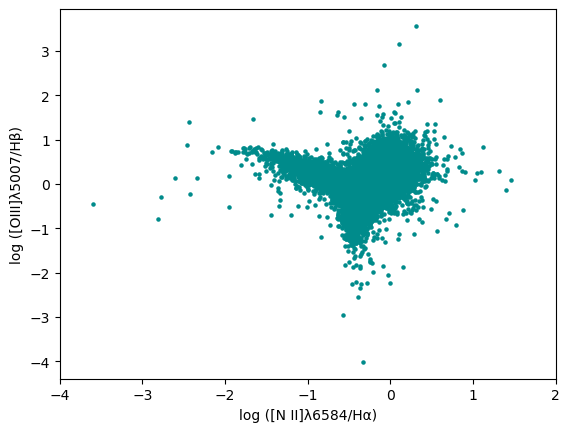

In [36]:
#plot BPT diagram
plt.xlabel('log ([N II]\u03BB6584/H\u03B1)')
plt.ylabel('log ([OIII]\u03BB5007/H\u03B2)')
plt.scatter(l_nii_Ha, l_oiii_Hb , color='darkcyan', s=5)
plt.xlim(-4,2)

In [37]:
# the theoretical curve from the paper Kewley et al. 2001, ApJ, 556, 121
#eqn 5, pg 137
l_oiii_Hb1 = 0.61/(l_nii_Ha-0.47) + 1.19
#l_oiii_Hb1

# empirical curve from the paper Kauffmann et al. 2003, MNRAS, 346, 1055
# eqn 1, pg 5
l_oiii_Hb2 = 0.61/(l_nii_Ha-0.05) + 1.3
#l_oiii_Hb2

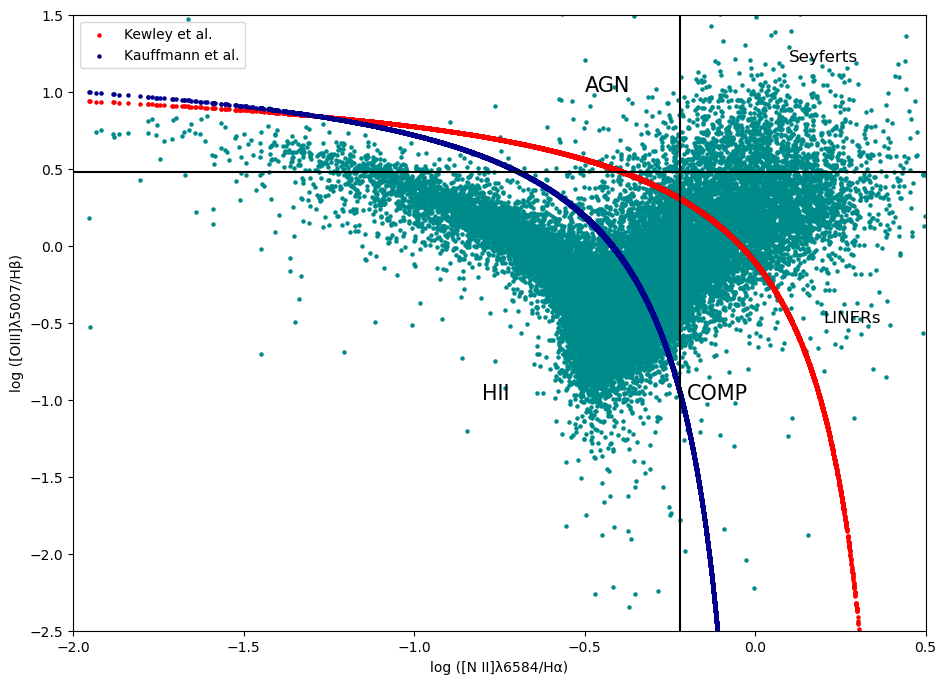

In [38]:
# plotting of the separation curves
plt.figure(figsize=(11,8))
plt.xlabel('log ([N II]\u03BB6584/H\u03B1)')
plt.ylabel('log ([OIII]\u03BB5007/H\u03B2)')
plt.scatter(l_nii_Ha, l_oiii_Hb , color='darkcyan', s=5)
plt.scatter(l_nii_Ha, l_oiii_Hb1 , color='red', s=5, label='Kewley et al.')
plt.scatter(l_nii_Ha, l_oiii_Hb2 , color='darkblue', s=5, label='Kauffmann et al.')
plt.xlim(-2,0.5)
plt.ylim(-2.5,1.5)

# putting text labels in a plot
plt.text(-0.2,-1.0, 'COMP', fontsize=15)
plt.text(0.2,-0.5, 'LINERs', fontsize=12)
plt.text(-0.5,1.0, 'AGN', fontsize=15)
plt.text(-0.8,-1.0, 'HII', fontsize=15)
plt.text(0.1,1.2, 'Seyferts', fontsize=12)

plt.axhline(0.48, linestyle='-', color='black')
plt.axvline(-0.22, linestyle='-', color='black')
plt.legend()

In [39]:
# calculating the opposite values from this equations because it is later required to plot the galaxies acc to classification
l_nii_Ha1=0.47+(0.61/(l_oiii_Hb-1.19))    #from Kewley

l_nii_Ha2= (0.61/(l_oiii_Hb-1.3))+0.05   #from Kauffmann

In [40]:
#classification with different colours
hii_mask = (l_oiii_Hb <= l_oiii_Hb2) & (l_nii_Ha <= l_nii_Ha2)
agn_mask = (l_oiii_Hb >= l_oiii_Hb1) & (l_nii_Ha >= l_nii_Ha1)
composite_mask =  (l_oiii_Hb2 <= l_oiii_Hb) & (l_oiii_Hb <= l_oiii_Hb1)
#composite_mask = ~(hii_mask | agn_mask)



# Create an empty list to store the galaxy classifications
classifications = []

# Loop over the galaxy IDs
for i in range(len(data1)):
   
    # Classify the galaxy
    if (l_oiii_Hb[i] >= l_oiii_Hb1[i]) & (l_nii_Ha[i] >= l_nii_Ha1[i]):
        classification = 'AGN'
    elif (l_oiii_Hb2[i] <= l_oiii_Hb[i]) & (l_oiii_Hb[i] <= l_oiii_Hb1[i]):
        classification = 'COMP'
    elif (l_oiii_Hb[i] <= l_oiii_Hb2[i]) & (l_nii_Ha[i] <= l_nii_Ha2[i]): 
        classification = 'HII'
    
    # Append the classification to the list
    classifications.append(classification)

# Add the classifications to the DataFrame
data1['BPT 1 classification'] = classifications
data1

,plate,mjd,fiberid,z,ra,dec,h_alpha_flux,h_beta_flux,oiii_5007_flux,nii_6584_flux,oi_6300_flux,sii_6717_flux,sii_6731_flux,h_alpha_eqw,log ([OIII]λ5007/Hβ),log ([N II]λ6584/Hα),BPT 1 classification
0,273,51957,561,0.131411,158.54355,1.005811,140.39550,39.12248,15.180250,65.45704,7.585262,24.82489,15.89550,-12.968330,-0.411147,-0.331397,HII
1,273,51957,573,0.072037,158.47062,0.928033,639.41880,167.54410,188.178900,137.85940,22.095960,118.79020,88.59984,-78.268990,0.050442,-0.666349,HII
2,273,51957,580,0.130287,158.47442,1.117546,192.23120,40.46349,17.760970,77.22557,5.964447,33.79130,17.81033,-20.884680,-0.357597,-0.396063,HII
3,273,51957,581,0.032456,158.70464,0.592561,101.00900,27.92737,50.667580,10.27734,1.706224,16.28673,12.35683,-24.719290,0.258700,-0.992479,HII
4,273,51957,583,0.064723,158.68310,0.162924,463.02300,117.46050,664.335000,161.00740,34.457580,98.55892,81.23889,-22.408960,0.752495,-0.458757,AGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,487,51943,620,0.094615,150.51135,63.845985,90.05506,16.73562,5.269124,43.78047,2.391038,13.64457,11.60049,-7.893099,-0.501903,-0.313228,HII
29996,487,51943,621,0.130739,151.60328,62.999008,226.11980,33.82486,5.501612,85.29299,8.265062,34.77994,21.38875,-28.665400,-0.788746,-0.423425,HII
29997,487,51943,625,0.195176,151.67249,63.540563,414.39660,117.77720,140.852000,103.48100,14.645290,59.84981,45.97960,-76.133850,0.077702,-0.602556,HII
29998,487,51943,636,0.208100,152.26822,63.474375,595.07240,140.44400,221.268100,134.30010,22.582220,94.37600,74.14742,-138.984700,0.197416,-0.646493,HII


Text(0, -1.5, 'COMP')

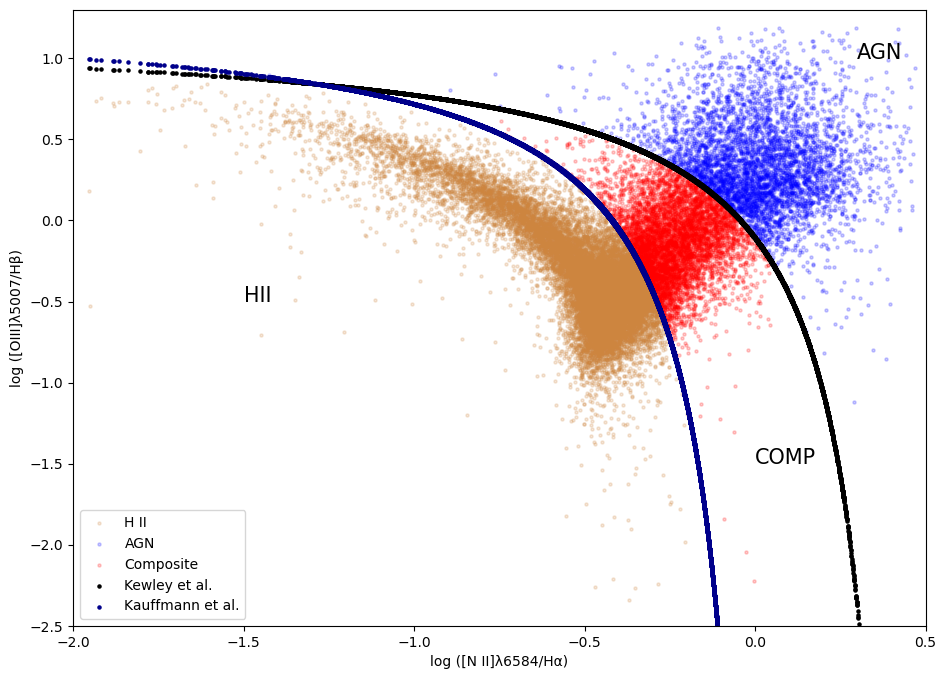

In [41]:
#plot acc to classification
plt.figure(figsize=(11,8))
plt.scatter(l_nii_Ha[hii_mask], l_oiii_Hb[hii_mask], c='peru', s=5, alpha=0.2, label='H II')
plt.scatter(l_nii_Ha[agn_mask], l_oiii_Hb[agn_mask], c='blue', s=5, alpha=0.2, label='AGN')
plt.scatter(l_nii_Ha[composite_mask], l_oiii_Hb[composite_mask], c='red', s=5, alpha=0.2, label='Composite')
plt.scatter(l_nii_Ha, l_oiii_Hb1 , color='black', s=5, label='Kewley et al.')
plt.scatter(l_nii_Ha, l_oiii_Hb2 , color='darkblue', s=5, label='Kauffmann et al.')
plt.xlim(-2,0.5)
plt.ylim(-2.5,1.3)
plt.xlabel('log ([N II]\u03BB6584/H\u03B1)')
plt.ylabel('log ([OIII]\u03BB5007/H\u03B2)')
plt.legend()
plt.text(0.3,1, 'AGN', fontsize=15)
plt.text(-1.5,-0.5, 'HII', fontsize=15)
plt.text(0,-1.5, 'COMP', fontsize=15)


In [42]:
# counting the number for each type of classification in BPT 1
count = data1['BPT 1 classification'].value_counts()
print(count)

HII     18864
COMP     6352
AGN      4784
Name: BPT 1 classification, dtype: int64


### TASK 1a:

Test the classification obtained using the first BPT diagnostics [OIII]λ5007/Hβ vs. [NII]λ6584/Hα,
with the other two common BPT diagnostic tools: 1) [OIII]λ5007/Hβ vs. [SII]λλ6717,6731/Hα, 2)
[OIII]λ5007/Hβ vs. [OI]λ6300/Hα. (Tip: use the same mark/color notation as for the first
diagnostic in order to be able to make comparison).

###### For [OIII]λ5007/Hβ vs. [SII]λλ6717,6731/Hα diagnostic tool

In [43]:
#added the flux of two lines of SII and used that for plotting as it's a doublet
sii_flux = data1['sii_6717_flux'] + data1['sii_6731_flux']
data1['sii_flux'] = sii_flux
#data1

In [44]:
# adding columns to the dataframe
#ratios of sii/H alpha line flux 
l_sii_Ha = []
sii_Ha = data1['sii_flux'] / data1['h_alpha_flux']
#sii_Ha
l_sii_Ha = np.log10(sii_Ha)
#l_sii_Ha
data1['log ([S II]\u03BB6731,6717/H\u03B1)'] = l_sii_Ha

#data1

In [45]:
# the theoretical curve from the paper Kewley et al. 2001, ApJ, 556, 121
#eqn 6, pg 137
l_oiii_Hb3 = 0.72/(l_sii_Ha-0.32) + 1.30
#l_oiii_Hb3
l_sii_Ha1 = 0.72/(l_oiii_Hb-1.30) + 0.32

In [46]:
# Create an empty list to store the galaxy classifications
classifications2 = []

# Loop over the galaxy IDs
for i in range(len(data1)):
   
    # Classify the galaxy
    if (l_oiii_Hb[i] >= l_oiii_Hb3[i]) & (l_sii_Ha[i] >= l_sii_Ha1[i]):
        classification2 = 'AGN'
    
    elif (l_oiii_Hb[i] <= l_oiii_Hb3[i]) & (l_sii_Ha[i] <= l_sii_Ha1[i]): 
        classification2 = 'HII'
    
    # Append the classification to the list
    classifications2.append(classification2)

# Add the classifications to the DataFrame
data1['BPT 2 classification'] = classifications2
#data1

(-2.5, 2.0)

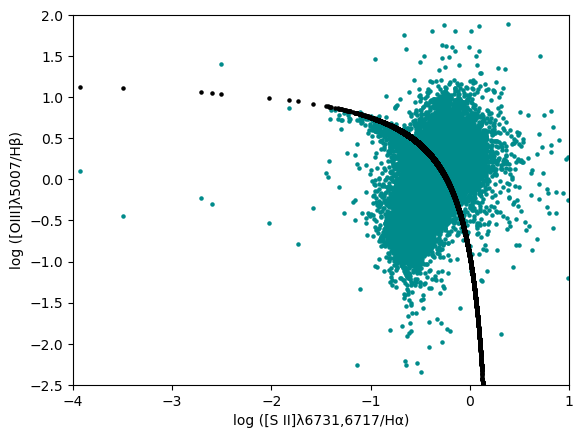

In [47]:
plt.xlabel('log ([S II]\u03BB6731,6717/H\u03B1)')
plt.ylabel('log ([OIII]\u03BB5007/H\u03B2)')
plt.scatter(l_sii_Ha, l_oiii_Hb, color='darkcyan', s=5)
plt.scatter(l_sii_Ha, l_oiii_Hb3, color='black', s=5, label='Kewley et al.')
plt.xlim(-4,1.0)
plt.ylim(-2.5,2)


Text(-3, -1.0, 'HII')

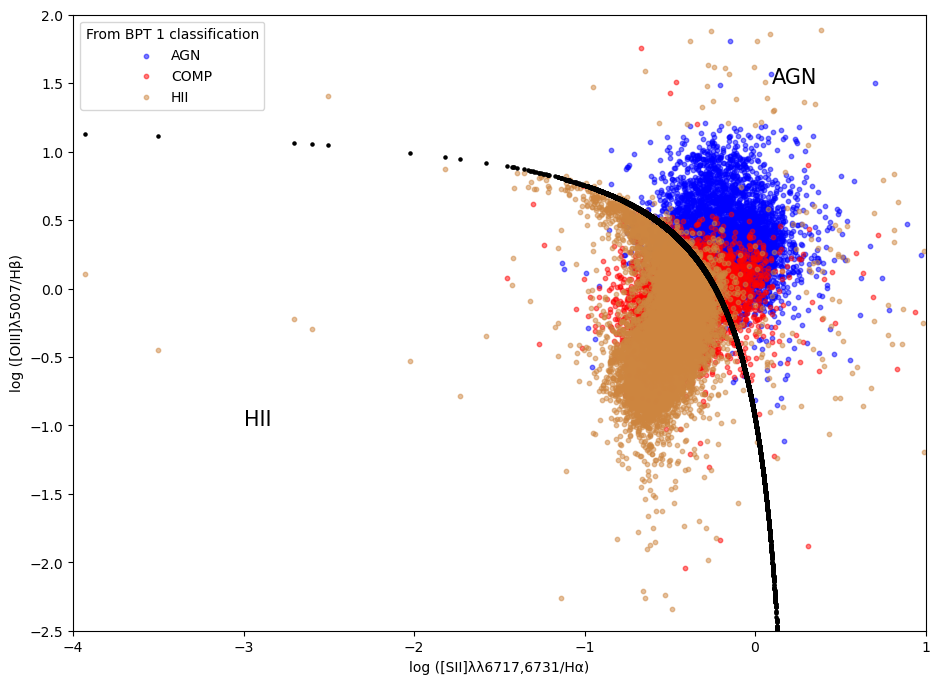

In [48]:
# plotting of the BPT curve using [OIII]λ5007/Hβ vs. [SII]λλ6716,6731/Hα
plt.figure(figsize=(11,8))
plt.xlabel('log ([SII]\u03BB\u03BB6717,6731/H\u03B1)')
plt.ylabel('log ([OIII]\u03BB5007/H\u03B2)')

# plotting using BPT classification by defining a function
def plot_bpt(data, classification, color):
    data_to_plot = data[data1['BPT 1 classification'] == classification]
    plt.scatter(data_to_plot['log ([S II]\u03BB6731,6717/H\u03B1)'], data_to_plot['log ([OIII]λ5007/Hβ)'], color=color, s=10, alpha=0.5)
bpt_class = ['AGN', 'COMP', 'HII']
colors = ['blue', 'red', 'peru']


for i in range(len(bpt_class)):
    plot_bpt(data1, bpt_class[i], colors[i])

plt.legend(bpt_class, title='From BPT 1 classification')


plt.scatter(l_sii_Ha, l_oiii_Hb3 , color='black', s=5, label='Kewley et al.')

plt.xlim(-4,1.0)
plt.ylim(-2.5,2)

# putting text labels in a plot

plt.text(0.1,1.5, 'AGN', fontsize=15)
plt.text(-3,-1.0, 'HII', fontsize=15)


#plt.axhline(0.48, linestyle='-', color='black')
#plt.axvline(-0.22, linestyle='-', color='black')
#plt.legend()

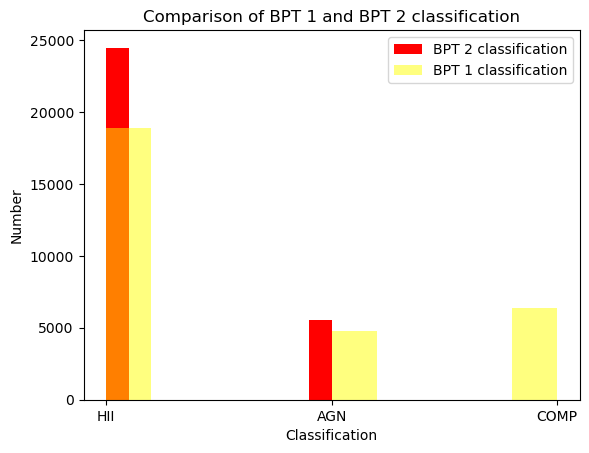

In [49]:
plt.hist(data1['BPT 2 classification'], color='red', label='BPT 2 classification')
plt.hist(data1['BPT 1 classification'], color='yellow', label='BPT 1 classification', alpha=0.5)
plt.xlabel('Classification')
plt.ylabel('Number')
plt.title('Comparison of BPT 1 and BPT 2 classification')
plt.legend()
plt.show()

In [50]:
# counting the number for each type of classification in BPT 1
count = data1['BPT 2 classification'].value_counts()
print(count)

HII    24457
AGN     5543
Name: BPT 2 classification, dtype: int64


##### For [OIII]λ5007/Hβ vs. [OI]λ6300/Hα diagnostic tool

In [51]:
# adding columns to the dataframe
#ratios of oi/H alpha line flux 
l_oi_Ha = []
oi_Ha = data1['oi_6300_flux'] / data1['h_alpha_flux']
#oi_Ha
l_oi_Ha = np.log10(oi_Ha)
#l_oi_Ha
data1['log ([O I]\u03BB6300/H\u03B1)'] = l_oi_Ha
#data1

In [52]:
# the theoretical curve from the paper Kewley et al. 2001, ApJ, 556, 121
#eqn 7, pg 137
l_oiii_Hb4 = 0.73/(l_oi_Ha+0.59) + 1.33
#l_oiii_Hb4
l_oi_Ha1 = 0.73/(l_oiii_Hb-1.33) - 0.59


In [53]:
# Create an empty list to store the galaxy classifications
classifications3 = []

# Loop over the galaxy IDs
for i in range(len(data1)):
   
    # Classify the galaxy
    if (l_oiii_Hb[i] >= l_oiii_Hb4[i]) & (l_oi_Ha[i] >= l_oi_Ha1[i]):
        classification3 = 'AGN'
    
    elif (l_oiii_Hb[i] <= l_oiii_Hb4[i]) & (l_oi_Ha[i] <= l_oi_Ha1[i]): 
        classification3 = 'HII'
    
    # Append the classification to the list
    classifications3.append(classification3)

# Add the classifications to the DataFrame
data1['BPT 3 classification'] = classifications3
data1

,plate,mjd,fiberid,z,ra,dec,h_alpha_flux,h_beta_flux,oiii_5007_flux,nii_6584_flux,...,sii_6731_flux,h_alpha_eqw,log ([OIII]λ5007/Hβ),log ([N II]λ6584/Hα),BPT 1 classification,sii_flux,"log ([S II]λ6731,6717/Hα)",BPT 2 classification,log ([O I]λ6300/Hα),BPT 3 classification
0,273,51957,561,0.131411,158.54355,1.005811,140.39550,39.12248,15.180250,65.45704,...,15.89550,-12.968330,-0.411147,-0.331397,HII,40.72039,-0.537541,HII,-1.267383,HII
1,273,51957,573,0.072037,158.47062,0.928033,639.41880,167.54410,188.178900,137.85940,...,88.59984,-78.268990,0.050442,-0.666349,HII,207.39004,-0.488998,HII,-1.461473,HII
2,273,51957,580,0.130287,158.47442,1.117546,192.23120,40.46349,17.760970,77.22557,...,17.81033,-20.884680,-0.357597,-0.396063,HII,51.60163,-0.571160,HII,-1.508254,HII
3,273,51957,581,0.032456,158.70464,0.592561,101.00900,27.92737,50.667580,10.27734,...,12.35683,-24.719290,0.258700,-0.992479,HII,28.64356,-0.547333,HII,-1.772324,HII
4,273,51957,583,0.064723,158.68310,0.162924,463.02300,117.46050,664.335000,161.00740,...,81.23889,-22.408960,0.752495,-0.458757,AGN,179.79781,-0.410818,AGN,-1.128318,AGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,487,51943,620,0.094615,150.51135,63.845985,90.05506,16.73562,5.269124,43.78047,...,11.60049,-7.893099,-0.501903,-0.313228,HII,25.24506,-0.552332,HII,-1.575922,HII
29996,487,51943,621,0.130739,151.60328,62.999008,226.11980,33.82486,5.501612,85.29299,...,21.38875,-28.665400,-0.788746,-0.423425,HII,56.16869,-0.604844,HII,-1.437092,HII
29997,487,51943,625,0.195176,151.67249,63.540563,414.39660,117.77720,140.852000,103.48100,...,45.97960,-76.133850,0.077702,-0.602556,HII,105.82941,-0.592810,HII,-1.451718,HII
29998,487,51943,636,0.208100,152.26822,63.474375,595.07240,140.44400,221.268100,134.30010,...,74.14742,-138.984700,0.197416,-0.646493,HII,168.52342,-0.547910,HII,-1.420803,HII


(-2.5, 2.0)

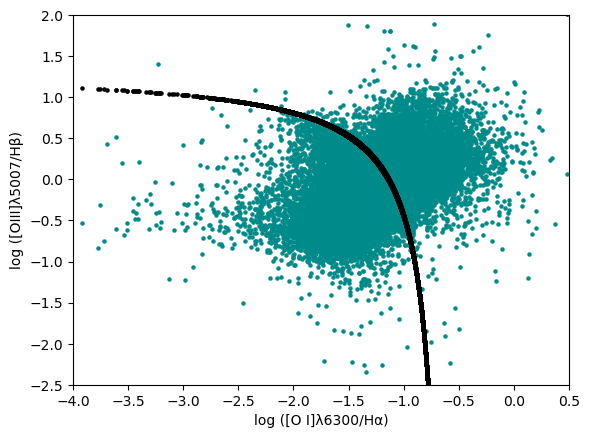

In [54]:
plt.xlabel('log ([O I]\u03BB6300/H\u03B1)')
plt.ylabel('log ([OIII]\u03BB5007/H\u03B2)')
plt.scatter(l_oi_Ha, l_oiii_Hb , color='darkcyan', s=5)
plt.scatter(l_oi_Ha, l_oiii_Hb4 , color='black', s=5, label='Kewley et al.')
plt.xlim(-4,0.5)
plt.ylim(-2.5,2)


Text(-3, -1.0, 'HII')

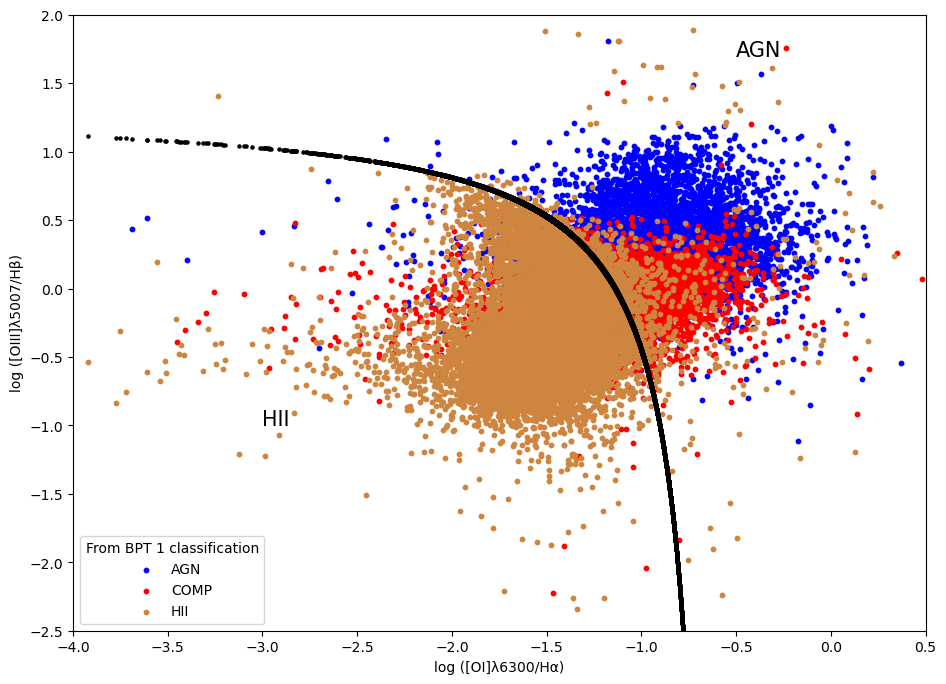

In [55]:
# plotting of the BPT curves using [OIII]λ5007/Hβ vs. [OI]λ6300/Hα
plt.figure(figsize=(11,8))
plt.xlabel('log ([OI]\u03BB6300/H\u03B1)')
plt.ylabel('log ([OIII]\u03BB5007/H\u03B2)')

# plotting using BPT classification by defining a function
def plot_bpt(data, classification, color):
    data_to_plot = data[data1['BPT 1 classification'] == classification]
    plt.scatter(data_to_plot['log ([O I]λ6300/Hα)'], data_to_plot['log ([OIII]λ5007/Hβ)'], color=color, s=10)
bpt_class = ['AGN', 'COMP', 'HII']
colors = ['blue', 'red', 'peru']


for i in range(len(bpt_class)):
    plot_bpt(data1, bpt_class[i], colors[i])

plt.legend(bpt_class, title='From BPT 1 classification')


plt.scatter(l_oi_Ha, l_oiii_Hb4 , color='black', s=5, label='Kewley et al.')


plt.xlim(-4,0.5)
plt.ylim(-2.5,2)

# putting text labels in a plot

plt.text(-0.5,1.7, 'AGN', fontsize=15)
plt.text(-3,-1.0, 'HII', fontsize=15)


#plt.axhline(0.48, linestyle='-', color='black')
#plt.axvline(-0.22, linestyle='-', color='black')
#plt.legend()

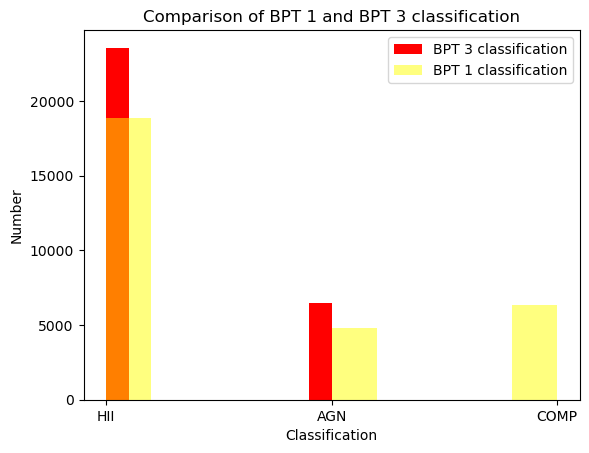

In [56]:
plt.hist(data1['BPT 3 classification'], color='red', label='BPT 3 classification')
plt.hist(data1['BPT 1 classification'], color='yellow', label='BPT 1 classification', alpha=0.5)
plt.xlabel('Classification')
plt.ylabel('Number')
plt.title('Comparison of BPT 1 and BPT 3 classification')
plt.legend()
plt.show()

In [57]:
# counting the number for each type of classification in BPT 1
count = data1['BPT 3 classification'].value_counts()
print(count)

HII    23555
AGN     6445
Name: BPT 3 classification, dtype: int64


In [58]:
# counting the no. of each type of classification, i.e., AGN and HII for all the 3 BPT diagrams 
mask1 = data1[['BPT 1 classification', 'BPT 2 classification', 'BPT 3 classification']] == 'AGN'
mask2 = data1[['BPT 1 classification', 'BPT 2 classification', 'BPT 3 classification']] == 'HII'
# Use the boolean mask to filter the dataframe and count the number of matches
count1 = mask1.all(axis=1).sum()
count2 = mask2.all(axis=1).sum()

print(count1)   #AGN
print(count2)   #HII


3344
18079


The first no gives the no of objects which are classified as agn in all 3 classifications and same for the second no which gives count of HII

### TASK 1b:

Make a WHAN diagram, the equivalent width of Hα (W Hα ) vs. [N II]/Hα ratio, for the objects
already classified (keep the same notation, i.e. the classification information obtained in the BPT
diagram). Comment and discuss the obtained results, give the number/percentage of objects
classified as (strong) AGN/Seyferts by the BPT and WHAN diagrams.

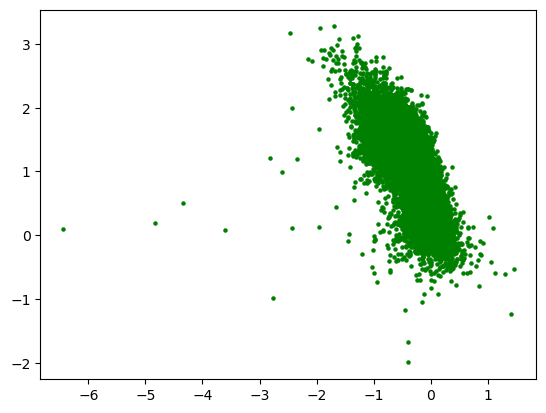

In [59]:
#acc. to fig.1 of Cid Fernandes, R. et al. 2011, MNRAS, 413, 1687
# plotting WHAN diagram
l_Ha_eqw = []
Ha_eqw = -data1['h_alpha_eqw']   #taking positive values while plotting since eqw width of emission lines r negative
l_Ha_eqw = np.log10(Ha_eqw)
#Ha_eqw
data1['log (H\u03B1 eqw)'] = l_Ha_eqw
#data1
plt.scatter(l_nii_Ha, l_Ha_eqw, c='green', s=5)
#plt.xlim(-2, 4)

In [60]:
classifications4 = []

# Loop over the galaxy IDs
for i in range(len(data1)):
   
    # Classify the galaxy acc to WHAN
    if (l_nii_Ha[i] < -0.4) & (Ha_eqw[i] > 3):
        classification4 = 'SF'
    elif (l_nii_Ha[i] > -0.4) & (Ha_eqw[i] > 6):
        classification4 = 'sAGN'
    elif (Ha_eqw[i] < 3):
        classification4 = 'RGs'
    elif (l_nii_Ha[i] > -0.4) & (Ha_eqw[i] >= 3) & (Ha_eqw[i] <= 6): 
        classification4 = 'wAGN'
    else:
        classification4 = 'Passive'
    
    
    # Append the classification to the list
    classifications4.append(classification4)

# Add the classifications to the DataFrame
data1['WHAN classification'] = classifications4
data1

,plate,mjd,fiberid,z,ra,dec,h_alpha_flux,h_beta_flux,oiii_5007_flux,nii_6584_flux,...,log ([OIII]λ5007/Hβ),log ([N II]λ6584/Hα),BPT 1 classification,sii_flux,"log ([S II]λ6731,6717/Hα)",BPT 2 classification,log ([O I]λ6300/Hα),BPT 3 classification,log (Hα eqw),WHAN classification
0,273,51957,561,0.131411,158.54355,1.005811,140.39550,39.12248,15.180250,65.45704,...,-0.411147,-0.331397,HII,40.72039,-0.537541,HII,-1.267383,HII,1.112884,sAGN
1,273,51957,573,0.072037,158.47062,0.928033,639.41880,167.54410,188.178900,137.85940,...,0.050442,-0.666349,HII,207.39004,-0.488998,HII,-1.461473,HII,1.893590,SF
2,273,51957,580,0.130287,158.47442,1.117546,192.23120,40.46349,17.760970,77.22557,...,-0.357597,-0.396063,HII,51.60163,-0.571160,HII,-1.508254,HII,1.319828,sAGN
3,273,51957,581,0.032456,158.70464,0.592561,101.00900,27.92737,50.667580,10.27734,...,0.258700,-0.992479,HII,28.64356,-0.547333,HII,-1.772324,HII,1.393036,SF
4,273,51957,583,0.064723,158.68310,0.162924,463.02300,117.46050,664.335000,161.00740,...,0.752495,-0.458757,AGN,179.79781,-0.410818,AGN,-1.128318,AGN,1.350422,SF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,487,51943,620,0.094615,150.51135,63.845985,90.05506,16.73562,5.269124,43.78047,...,-0.501903,-0.313228,HII,25.24506,-0.552332,HII,-1.575922,HII,0.897248,sAGN
29996,487,51943,621,0.130739,151.60328,62.999008,226.11980,33.82486,5.501612,85.29299,...,-0.788746,-0.423425,HII,56.16869,-0.604844,HII,-1.437092,HII,1.457358,SF
29997,487,51943,625,0.195176,151.67249,63.540563,414.39660,117.77720,140.852000,103.48100,...,0.077702,-0.602556,HII,105.82941,-0.592810,HII,-1.451718,HII,1.881578,SF
29998,487,51943,636,0.208100,152.26822,63.474375,595.07240,140.44400,221.268100,134.30010,...,0.197416,-0.646493,HII,168.52342,-0.547910,HII,-1.420803,HII,2.142967,SF


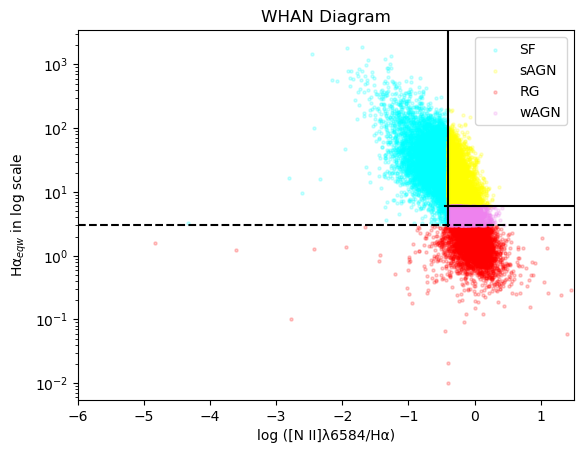

In [61]:
sf_mask2 = (l_nii_Ha < -0.4) & (Ha_eqw > 3)
sAGN_mask2 = (l_nii_Ha > -0.4) & (Ha_eqw > 6)
RG_mask2 = Ha_eqw < 3
wAGN_mask2 = (l_nii_Ha > -0.4) & (Ha_eqw >= 3) & (Ha_eqw <= 6)

plt.scatter(l_nii_Ha[sf_mask2], Ha_eqw[sf_mask2], c='cyan', s=5, alpha=0.2, label='SF')
plt.scatter(l_nii_Ha[sAGN_mask2], Ha_eqw[sAGN_mask2], c='yellow', s=5, alpha=0.2, label='sAGN')
plt.scatter(l_nii_Ha[RG_mask2], Ha_eqw[RG_mask2], c='red', s=5, alpha=0.2, label='RG')
plt.scatter(l_nii_Ha[wAGN_mask2], Ha_eqw[wAGN_mask2], c='violet', s=5, alpha=0.2, label='wAGN')
plt.yscale('log')
plt.axhline(y=6,xmin=0.74, linestyle='-', color='black')
plt.axvline(x=-0.4,ymin=0.47, linestyle='-', color='black')
plt.axhline(3, linestyle='--', color='black')
plt.xlabel('log ([N II]\u03BB6584/H\u03B1)')
plt.ylabel('H\u03B1$_{eqw}$ in log scale')
plt.xlim(-6,1.5)
plt.title('WHAN Diagram')
plt.legend()

Text(0.5, 1.0, 'WHAN Diagram')

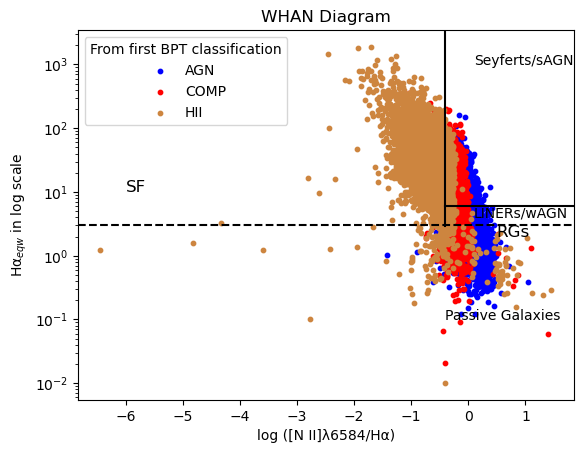

In [62]:
# plotting of the WHAN diagrams using [NII]λ6584/Hα vs. Hα-eqw. width
#plt.figure(figsize=(10,8))
plt.xlabel('log ([N II]\u03BB6584/H\u03B1)')
plt.ylabel('H\u03B1$_{eqw}$ in log scale')

# plotting using BPT classification by defining a function
def plot_bpt(data, classification, color):
    data_to_plot = data[data1['BPT 1 classification'] == classification]
    z=(-1)*data_to_plot['h_alpha_eqw']    #to make it positive
    plt.scatter(data_to_plot['log ([N II]λ6584/Hα)'], z, color=color, s=10)
    
bpt_class = ['AGN', 'COMP', 'HII']
colors = ['blue', 'red', 'peru']


for i in range(len(bpt_class)):
    plot_bpt(data1, bpt_class[i], colors[i])

plt.legend(bpt_class, title='From first BPT classification')
plt.yscale('log')


plt.axhline(y=6,xmin=0.74, linestyle='-', color='black')
plt.axvline(x=-0.4,ymin=0.47, linestyle='-', color='black')
plt.axhline(3, linestyle='--', color='black')
#plt.xlim(-4,2)
#plt.ylim(-2.5,2)

# putting text labels in a plot

plt.text(0.1,4, 'LINERs/wAGN', fontsize=10)
plt.text(-6,10, 'SF', fontsize=12)
plt.text(0.1,1000, 'Seyferts/sAGN', fontsize=10)
plt.text(-0.4,0.1, 'Passive Galaxies', fontsize=10)
plt.text(0.5,2, 'RGs', fontsize=12)
plt.title('WHAN Diagram')
#this classifications are acc. to the paper https://arxiv.org/pdf/1012.4426.pdf pg-9, fig. 6
#plt.legend()

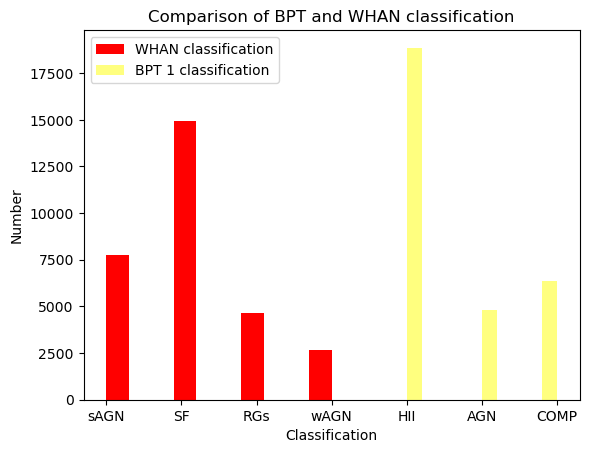

In [63]:
plt.hist(data1['WHAN classification'], color='red', label='WHAN classification')
plt.hist(data1['BPT 1 classification'], color='yellow', label='BPT 1 classification', alpha=0.5)
plt.xlabel('Classification')
plt.ylabel('Number')
plt.title('Comparison of BPT and WHAN classification')
plt.legend()
plt.show()

In [64]:
# counting the number for each type of classification in WHAN
count = data1['WHAN classification'].value_counts()
print(count)

SF      14942
sAGN     7733
RGs      4668
wAGN     2657
Name: WHAN classification, dtype: int64


In [65]:
### check later
 #counting the no. of each type of classification, i.e., AGN for the BPT and WHAN diagrams 
count = 0

# Loop over the galaxy IDs
for i in range(len(data1)):
    if (data1['BPT 1 classification'][i]=='AGN') & (data1['WHAN classification'][i]=='sAGN'):
        count = count + 1
    
print(count)


941


### TASK 2:

For a subsample of these SDSS objects, there are also [Ne III]λ3869 and [O II]λλ3726,3729 line 
fluxes available (tip: set S/N ratio to at least 5). Extract that subsample from the first sample, 
together with their g, z magnitudes and above line fluxes. Make the BPT and TBT diagrams for this 
subsample, keeping the same notation (i.e. use the classification information obtained in the BPT 
diagram for the TBT diagram). The observed magnitudes should be transformed to the z=0 frame 
using k-correction (Chilingarian et al. 2010, website: http://kcor.sai.msu.ru/ or Blanton & Roweis 
2007, website: http://howdy.physics.nyu.edu/index.php/Kcorrect).

The division line on the TBT diagram is as follows:

(g-z)0 = -1.2 x log([NeIII]/[OII]) - 0.4

where (g-z)0 is the rest-frame g-z color, [NeIII] is the line flux of [Ne III] λ3869 and [OII] is the line 
flux of the [OII] λλ3726,3729 doublet (sometimes labeled as [OII] λ3727 when the doublet 
components are not resolved). 

Comment on what is the number/percentage of objects defined as AGN by BPT, TBT and both 
BPT and TBT diagrams.

link for TBT paper: https://iopscience.iop.org/article/10.1088/0004-637X/742/1/46/pdf 

###### SQL  query to obtain the g_mag and z_mag from SDSS database

SELECT 

s.plate, s.mjd, s.fiberid, p.psfMag_g, p.psfMag_z

FROM PhotoObjAll AS p
    
    JOIN SpecObj AS s ON s.bestobjid = p.objid

WHERE 

s.class = "GALAXY" 

AND s.z < 0.3

AND s.snmedian_g >5


In [66]:
#reading the data from SDSS
#data2 = pd.read_csv("C:/Users/SREEPARNA/OneDrive/Documents/Belgrade/AGN/AGN project/Data2project.csv")
data2 = pd.read_csv("C:/Users/SREEPARNA/OneDrive/Documents/Belgrade/AGN/AGN project/datapsf.csv")
#data2

In [67]:
#merging both the data sets based on plate, mjd, fiberid 
merged_data = pd.merge(data1, data2, on=['plate', 'mjd', 'fiberid'])
#merged_data

##### Query for obtaining flux values from SDSS

SELECT 

s.plate, s.mjd, s.fiberid,

g.neiii_3869_flux, g.oii_3729_flux, g.oii_3726_flux

FROM SpecObj AS s
      
     JOIN GalSpecLine AS g ON s.specobjid = g.specobjid
      
WHERE

g.neiii_3869_eqw < 0

AND  g.oii_3729_eqw < 0

AND g.oii_3726_eqw < 0

AND g.neiii_3869_flux > 0

AND g.oii_3729_flux > 0

AND g.oii_3726_flux > 0

AND SQRT(8*LOG(2)) * g.sigma_balmer < 500 -- FWHM = sigma * sqrt(8*ln(2)) for narrow emission lines

AND s.class = "GALAXY" 

AND s.z < 0.3

AND s.snmedian_g >5

In [68]:
#reading the data from SDSS 
data3 = pd.read_csv("C:/Users/SREEPARNA/OneDrive/Documents/Belgrade/AGN/AGN project/Data3project.csv")
#data3

In [69]:
#merging both the data sets based on plate, mjd, fiberid by extracting the subsample from the first sample(data1). 
data4 = pd.merge(merged_data, data3, on=['plate', 'mjd', 'fiberid'])
data4

,plate,mjd,fiberid,z,ra,dec,h_alpha_flux,h_beta_flux,oiii_5007_flux,nii_6584_flux,...,BPT 2 classification,log ([O I]λ6300/Hα),BPT 3 classification,log (Hα eqw),WHAN classification,psfMag_g,psfMag_z,neiii_3869_flux,oii_3729_flux,oii_3726_flux
0,273,51957,573,0.072037,158.47062,0.928033,639.41880,167.544100,188.178900,137.85940,...,HII,-1.461473,HII,1.893590,SF,19.15697,18.44811,13.914110,254.139500,193.564100
1,273,51957,581,0.032456,158.70464,0.592561,101.00900,27.927370,50.667580,10.27734,...,HII,-1.772324,HII,1.393036,SF,20.07297,19.36568,12.942870,47.975790,45.488890
2,273,51957,583,0.064723,158.68310,0.162924,463.02300,117.460500,664.335000,161.00740,...,AGN,-1.128318,AGN,1.350422,SF,18.61063,17.24564,40.801220,112.377300,94.290770
3,273,51957,587,0.109359,158.95203,0.583489,31.84390,8.137123,24.325420,44.79599,...,AGN,-0.958267,AGN,0.408876,RGs,19.46636,17.63959,4.426631,15.125350,18.828490
4,273,51957,588,0.065650,158.72739,0.565305,208.78330,56.598430,24.597810,64.85646,...,HII,-1.469312,HII,1.498964,SF,19.74486,18.76666,4.113236,74.966660,62.068260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11013,487,51943,578,0.137741,150.26615,63.640534,723.43820,144.693900,25.675850,268.68770,...,HII,-1.616567,HII,1.629329,SF,19.01545,17.80579,4.233400,54.617020,48.166610
11014,487,51943,579,0.137970,150.39131,63.708590,19.97934,5.439281,19.326060,28.37638,...,AGN,-1.273289,AGN,0.067136,RGs,19.20315,17.43148,1.566756,15.653080,25.967150
11015,487,51943,580,0.116982,150.24525,64.149586,47.34806,7.576041,14.268640,33.51227,...,HII,-1.309249,HII,0.729328,wAGN,19.98444,18.28802,2.778333,8.950201,2.621991
11016,487,51943,581,0.128499,151.32312,63.208706,46.86292,9.045783,9.803022,40.18322,...,AGN,-0.701658,AGN,0.548877,wAGN,19.29565,17.60314,4.928000,11.470050,12.854150


In [70]:
#added the flux of two lines of OII and used that for plotting as it's a doublet
oii_flux = data4['oii_3729_flux'] + data4['oii_3726_flux']
data4['oii_flux'] = oii_flux
data4

,plate,mjd,fiberid,z,ra,dec,h_alpha_flux,h_beta_flux,oiii_5007_flux,nii_6584_flux,...,log ([O I]λ6300/Hα),BPT 3 classification,log (Hα eqw),WHAN classification,psfMag_g,psfMag_z,neiii_3869_flux,oii_3729_flux,oii_3726_flux,oii_flux
0,273,51957,573,0.072037,158.47062,0.928033,639.41880,167.544100,188.178900,137.85940,...,-1.461473,HII,1.893590,SF,19.15697,18.44811,13.914110,254.139500,193.564100,447.703600
1,273,51957,581,0.032456,158.70464,0.592561,101.00900,27.927370,50.667580,10.27734,...,-1.772324,HII,1.393036,SF,20.07297,19.36568,12.942870,47.975790,45.488890,93.464680
2,273,51957,583,0.064723,158.68310,0.162924,463.02300,117.460500,664.335000,161.00740,...,-1.128318,AGN,1.350422,SF,18.61063,17.24564,40.801220,112.377300,94.290770,206.668070
3,273,51957,587,0.109359,158.95203,0.583489,31.84390,8.137123,24.325420,44.79599,...,-0.958267,AGN,0.408876,RGs,19.46636,17.63959,4.426631,15.125350,18.828490,33.953840
4,273,51957,588,0.065650,158.72739,0.565305,208.78330,56.598430,24.597810,64.85646,...,-1.469312,HII,1.498964,SF,19.74486,18.76666,4.113236,74.966660,62.068260,137.034920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11013,487,51943,578,0.137741,150.26615,63.640534,723.43820,144.693900,25.675850,268.68770,...,-1.616567,HII,1.629329,SF,19.01545,17.80579,4.233400,54.617020,48.166610,102.783630
11014,487,51943,579,0.137970,150.39131,63.708590,19.97934,5.439281,19.326060,28.37638,...,-1.273289,AGN,0.067136,RGs,19.20315,17.43148,1.566756,15.653080,25.967150,41.620230
11015,487,51943,580,0.116982,150.24525,64.149586,47.34806,7.576041,14.268640,33.51227,...,-1.309249,HII,0.729328,wAGN,19.98444,18.28802,2.778333,8.950201,2.621991,11.572192
11016,487,51943,581,0.128499,151.32312,63.208706,46.86292,9.045783,9.803022,40.18322,...,-0.701658,AGN,0.548877,wAGN,19.29565,17.60314,4.928000,11.470050,12.854150,24.324200


Text(0, -1.5, 'COMP')

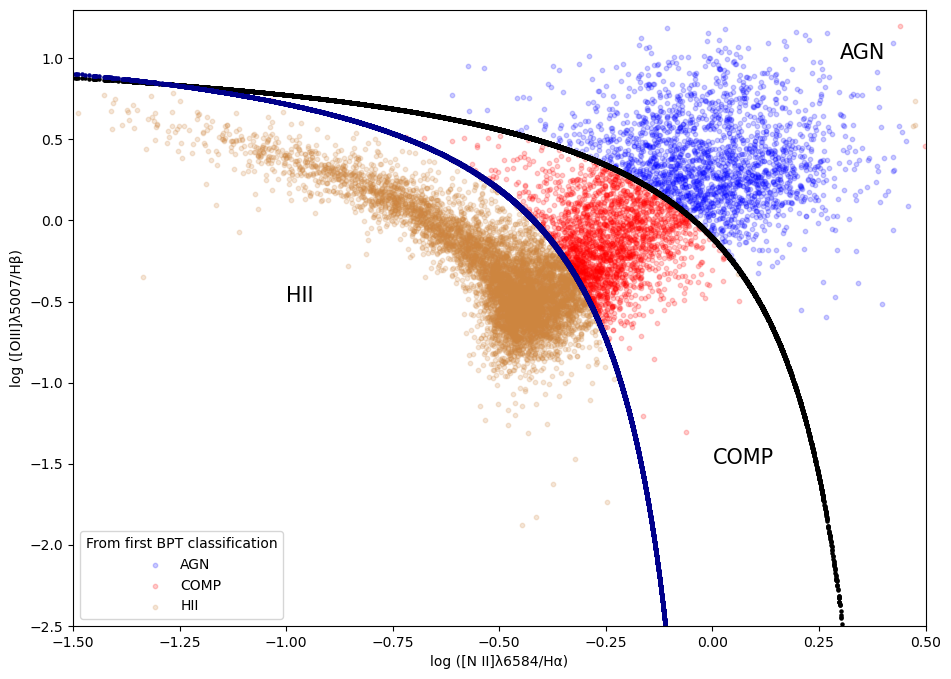

In [71]:
# plotting of the BPT curves using [OIII]λ5007/Hβ vs. [N II]λ6584/Hα
plt.figure(figsize=(11,8))
plt.xlabel('log ([N II]\u03BB6584/H\u03B1)')
plt.ylabel('log ([OIII]\u03BB5007/H\u03B2)')

# plotting using BPT classification by defining a function
def plot_bpt(data, classification, color):
    data_to_plot = data[data4['BPT 1 classification'] == classification]
    plt.scatter(data_to_plot['log ([N II]λ6584/Hα)'], data_to_plot['log ([OIII]λ5007/Hβ)'], color=color, s=10, alpha=0.2)
bpt_class = ['AGN', 'COMP', 'HII']
colors = ['blue', 'red', 'peru']


for i in range(len(bpt_class)):
    plot_bpt(data4, bpt_class[i], colors[i])

plt.legend(bpt_class, title='From first BPT classification')

plt.scatter(l_nii_Ha, l_oiii_Hb1 , color='black', s=5, label='Kewley et al.')
plt.scatter(l_nii_Ha, l_oiii_Hb2 , color='darkblue', s=5, label='Kauffmann et al.')

plt.xlim(-1.5,0.5)
plt.ylim(-2.5,1.3)

# putting text labels in a plot
plt.text(0.3,1, 'AGN', fontsize=15)
plt.text(-1.0,-0.5, 'HII', fontsize=15)
plt.text(0,-1.5, 'COMP', fontsize=15)





In [72]:
# counting the number for each type of classification in BPT for reduced objects
count = data4['BPT 1 classification'].value_counts()
print(count)

HII     6743
COMP    2249
AGN     2026
Name: BPT 1 classification, dtype: int64


In [73]:
# adding columns to the dataframe
#ratios of neiii/oii line flux 
l_neiii_oii = []
neiii_oii = data4['neiii_3869_flux'] / data4['oii_flux']
l_neiii_oii = np.log10(neiii_oii)

data4['log ([NeIII]\u03BB3869/[OII]\u03BB3726\u03BB3729)'] = l_neiii_oii
#data4

In [74]:
# importing the different functions which are defined in the calc_kor.py file to use it here
from calc_kcor import (calc_kcor)

In [75]:
#calculating the uncorrected (g-z) and storing it in df
g_z_uncorrected = []
g_z_uncorrected = data4['psfMag_g'] - data4['psfMag_z']
data4['(g-z)$_{uncor}$'] = g_z_uncorrected 
data4

,plate,mjd,fiberid,z,ra,dec,h_alpha_flux,h_beta_flux,oiii_5007_flux,nii_6584_flux,...,log (Hα eqw),WHAN classification,psfMag_g,psfMag_z,neiii_3869_flux,oii_3729_flux,oii_3726_flux,oii_flux,log ([NeIII]λ3869/[OII]λ3726λ3729),(g-z)$_{uncor}$
0,273,51957,573,0.072037,158.47062,0.928033,639.41880,167.544100,188.178900,137.85940,...,1.893590,SF,19.15697,18.44811,13.914110,254.139500,193.564100,447.703600,-1.507535,0.70886
1,273,51957,581,0.032456,158.70464,0.592561,101.00900,27.927370,50.667580,10.27734,...,1.393036,SF,20.07297,19.36568,12.942870,47.975790,45.488890,93.464680,-0.858617,0.70729
2,273,51957,583,0.064723,158.68310,0.162924,463.02300,117.460500,664.335000,161.00740,...,1.350422,SF,18.61063,17.24564,40.801220,112.377300,94.290770,206.668070,-0.704600,1.36499
3,273,51957,587,0.109359,158.95203,0.583489,31.84390,8.137123,24.325420,44.79599,...,0.408876,RGs,19.46636,17.63959,4.426631,15.125350,18.828490,33.953840,-0.884816,1.82677
4,273,51957,588,0.065650,158.72739,0.565305,208.78330,56.598430,24.597810,64.85646,...,1.498964,SF,19.74486,18.76666,4.113236,74.966660,62.068260,137.034920,-1.522648,0.97820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11013,487,51943,578,0.137741,150.26615,63.640534,723.43820,144.693900,25.675850,268.68770,...,1.629329,SF,19.01545,17.80579,4.233400,54.617020,48.166610,102.783630,-1.385235,1.20966
11014,487,51943,579,0.137970,150.39131,63.708590,19.97934,5.439281,19.326060,28.37638,...,0.067136,RGs,19.20315,17.43148,1.566756,15.653080,25.967150,41.620230,-1.424303,1.77167
11015,487,51943,580,0.116982,150.24525,64.149586,47.34806,7.576041,14.268640,33.51227,...,0.729328,wAGN,19.98444,18.28802,2.778333,8.950201,2.621991,11.572192,-0.619631,1.69642
11016,487,51943,581,0.128499,151.32312,63.208706,46.86292,9.045783,9.803022,40.18322,...,0.548877,wAGN,19.29565,17.60314,4.928000,11.470050,12.854150,24.324200,-0.693368,1.69251


In [76]:
#performing the k-correction
corr_g_z = []
for i in range(len(data4)):
    
    g_z = calc_kcor('g',data4['z'][i],'g - z',data4['(g-z)$_{uncor}$'][i])
    corr_g_z.append(g_z)
data4['(g-z)$_{cor}$'] = corr_g_z
data4
#type(data4['(g-z)$_{cor}$'])

,plate,mjd,fiberid,z,ra,dec,h_alpha_flux,h_beta_flux,oiii_5007_flux,nii_6584_flux,...,WHAN classification,psfMag_g,psfMag_z,neiii_3869_flux,oii_3729_flux,oii_3726_flux,oii_flux,log ([NeIII]λ3869/[OII]λ3726λ3729),(g-z)$_{uncor}$,(g-z)$_{cor}$
0,273,51957,573,0.072037,158.47062,0.928033,639.41880,167.544100,188.178900,137.85940,...,SF,19.15697,18.44811,13.914110,254.139500,193.564100,447.703600,-1.507535,0.70886,0.014367
1,273,51957,581,0.032456,158.70464,0.592561,101.00900,27.927370,50.667580,10.27734,...,SF,20.07297,19.36568,12.942870,47.975790,45.488890,93.464680,-0.858617,0.70729,0.031373
2,273,51957,583,0.064723,158.68310,0.162924,463.02300,117.460500,664.335000,161.00740,...,SF,18.61063,17.24564,40.801220,112.377300,94.290770,206.668070,-0.704600,1.36499,0.125639
3,273,51957,587,0.109359,158.95203,0.583489,31.84390,8.137123,24.325420,44.79599,...,RGs,19.46636,17.63959,4.426631,15.125350,18.828490,33.953840,-0.884816,1.82677,0.277648
4,273,51957,588,0.065650,158.72739,0.565305,208.78330,56.598430,24.597810,64.85646,...,SF,19.74486,18.76666,4.113236,74.966660,62.068260,137.034920,-1.522648,0.97820,0.060992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11013,487,51943,578,0.137741,150.26615,63.640534,723.43820,144.693900,25.675850,268.68770,...,SF,19.01545,17.80579,4.233400,54.617020,48.166610,102.783630,-1.385235,1.20966,0.116152
11014,487,51943,579,0.137970,150.39131,63.708590,19.97934,5.439281,19.326060,28.37638,...,RGs,19.20315,17.43148,1.566756,15.653080,25.967150,41.620230,-1.424303,1.77167,0.351425
11015,487,51943,580,0.116982,150.24525,64.149586,47.34806,7.576041,14.268640,33.51227,...,wAGN,19.98444,18.28802,2.778333,8.950201,2.621991,11.572192,-0.619631,1.69642,0.279834
11016,487,51943,581,0.128499,151.32312,63.208706,46.86292,9.045783,9.803022,40.18322,...,wAGN,19.29565,17.60314,4.928000,11.470050,12.854150,24.324200,-0.693368,1.69251,0.305654


In [77]:
#calculating the TBT line
g_z = -1.2*l_neiii_oii-0.4
#plt.scatter(l_neiii_oii, g_z, color='black', s=5)
l_neiii_oii1 = (data4['(g-z)$_{cor}$'] + 0.4)/(-1.2)
#type(g_z)

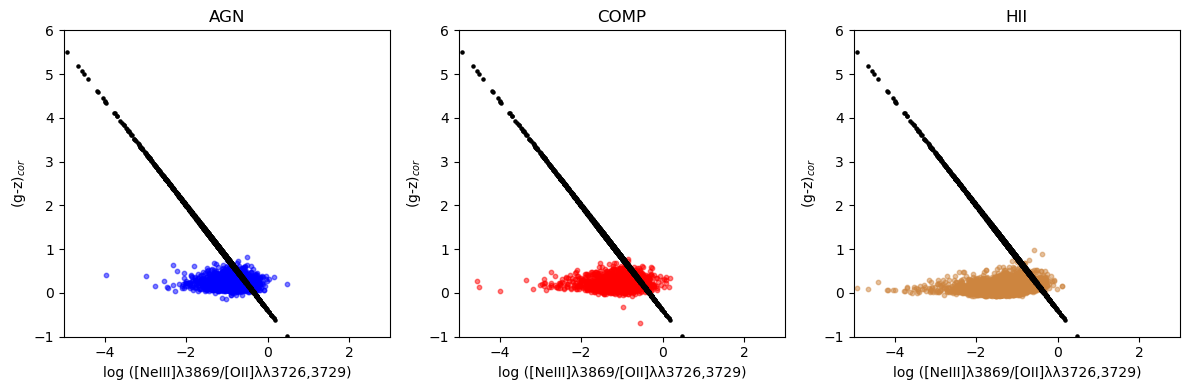

In [78]:
# plotting of the TBT diagram
# plotting using BPT classification by defining a function

def plot_bpt(ax, data, classification, color):
    data_to_plot = data[data4['BPT 1 classification'] == classification]
    ax.scatter(data_to_plot['log ([NeIII]\u03BB3869/[OII]\u03BB3726\u03BB3729)'], data_to_plot['(g-z)$_{cor}$'], color=color, s=10, alpha=0.5)
    ax.scatter(l_neiii_oii, g_z, color='black', s=5)
    ax.set_xlabel('log ([NeIII]λ3869/[OII]λλ3726,3729)')
    ax.set_ylabel('(g-z)$_{cor}$')
    ax.set_title(classification)
    ax.set_xlim(-5, 3)
    ax.set_ylim(-1, 6)

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
bpt_class = ['AGN', 'COMP', 'HII']
colors = ['blue', 'red', 'peru']

for i, ax in enumerate(axs):
    plot_bpt(ax, data4, bpt_class[i], colors[i])
plt.tight_layout()
#plt.title('TBT Diagram')
#plt.legend(bpt_class, title='From first BPT classification')


# putting text labels in a plot
#.text(0.3,1, 'AGN', fontsize=15)
#plt.text(-1.0,-0.5, 'HII', fontsize=15)
#plt.text(0,-1.5, 'COMP', fontsize=15)

In [79]:
# Create an empty list to store the galaxy classifications
classifications5 = []

# Loop over the galaxy IDs
for i in range(len(data4)):
   
    # Classify the galaxy
    if (corr_g_z[i] >= g_z[i]) & (l_neiii_oii[i] >= l_neiii_oii1[i]):
        classification5 = 'AGN'
    
    elif (corr_g_z[i] <= g_z[i]) & (l_neiii_oii[i] <= l_neiii_oii1[i]): 
        classification5 = 'HII'
    
    # Append the classification to the list
    classifications5.append(classification5)

# Add the classifications to the DataFrame
data4['TBT classification'] = classifications5
data4

,plate,mjd,fiberid,z,ra,dec,h_alpha_flux,h_beta_flux,oiii_5007_flux,nii_6584_flux,...,psfMag_g,psfMag_z,neiii_3869_flux,oii_3729_flux,oii_3726_flux,oii_flux,log ([NeIII]λ3869/[OII]λ3726λ3729),(g-z)$_{uncor}$,(g-z)$_{cor}$,TBT classification
0,273,51957,573,0.072037,158.47062,0.928033,639.41880,167.544100,188.178900,137.85940,...,19.15697,18.44811,13.914110,254.139500,193.564100,447.703600,-1.507535,0.70886,0.014367,HII
1,273,51957,581,0.032456,158.70464,0.592561,101.00900,27.927370,50.667580,10.27734,...,20.07297,19.36568,12.942870,47.975790,45.488890,93.464680,-0.858617,0.70729,0.031373,HII
2,273,51957,583,0.064723,158.68310,0.162924,463.02300,117.460500,664.335000,161.00740,...,18.61063,17.24564,40.801220,112.377300,94.290770,206.668070,-0.704600,1.36499,0.125639,HII
3,273,51957,587,0.109359,158.95203,0.583489,31.84390,8.137123,24.325420,44.79599,...,19.46636,17.63959,4.426631,15.125350,18.828490,33.953840,-0.884816,1.82677,0.277648,HII
4,273,51957,588,0.065650,158.72739,0.565305,208.78330,56.598430,24.597810,64.85646,...,19.74486,18.76666,4.113236,74.966660,62.068260,137.034920,-1.522648,0.97820,0.060992,HII
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11013,487,51943,578,0.137741,150.26615,63.640534,723.43820,144.693900,25.675850,268.68770,...,19.01545,17.80579,4.233400,54.617020,48.166610,102.783630,-1.385235,1.20966,0.116152,HII
11014,487,51943,579,0.137970,150.39131,63.708590,19.97934,5.439281,19.326060,28.37638,...,19.20315,17.43148,1.566756,15.653080,25.967150,41.620230,-1.424303,1.77167,0.351425,HII
11015,487,51943,580,0.116982,150.24525,64.149586,47.34806,7.576041,14.268640,33.51227,...,19.98444,18.28802,2.778333,8.950201,2.621991,11.572192,-0.619631,1.69642,0.279834,HII
11016,487,51943,581,0.128499,151.32312,63.208706,46.86292,9.045783,9.803022,40.18322,...,19.29565,17.60314,4.928000,11.470050,12.854150,24.324200,-0.693368,1.69251,0.305654,HII


In [80]:
# counting the number for each type of classification in TBT
count = data4['TBT classification'].value_counts()
print(count)

HII    10426
AGN      592
Name: TBT classification, dtype: int64


In [81]:
# counting the no. of each type of classification, i.e., AGN and HII for all the BPT and TBT diagrams 
mask1 = data4[['BPT 1 classification', 'TBT classification']] == 'AGN'
mask2 = data4[['BPT 1 classification', 'TBT classification']] == 'HII'
# Use the boolean mask to filter the dataframe and count the number of matches
count1 = mask1.all(axis=1).sum()
count2 = mask2.all(axis=1).sum()

print(count1)   #AGN
print(count2)   #HII

303
6627


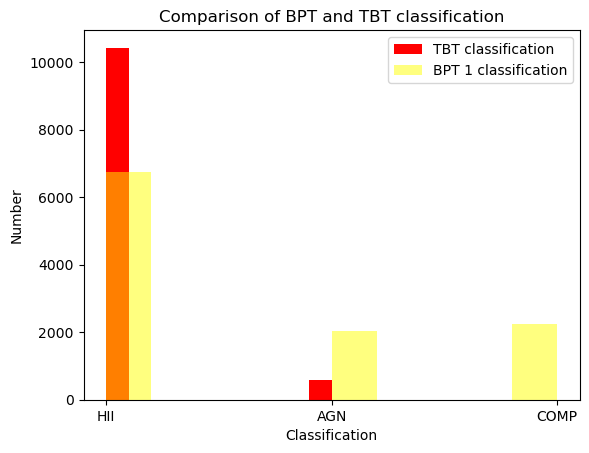

In [82]:
plt.hist(data4['TBT classification'], color='red', label='TBT classification')
plt.hist(data4['BPT 1 classification'], color='yellow', label='BPT 1 classification', alpha=0.5)
plt.xlabel('Classification')
plt.ylabel('Number')
plt.title('Comparison of BPT and TBT classification')
plt.legend()
plt.show()

### TASK 3:
For sample of AGN selected from the SDSS database, find the WISE counterparts with a matching 
tolerance of 3ʹʹ (∼ 0.5×FWHM of the WISE PSF at 3.4 μm), and get the three WISE colors
(W1,W2,W3). Locate the object on the WISE colour-colour plot using the selection criteria defined 
by Mateos et al. (2012, 2013):

y = 0.315 × x

x ≡ log10(f12um/f4.6um) 

y ≡ log10(f4.6um/f3.4um)

The top and bottom boundaries of the wedge are obtained by adding y-axis intercepts of +0.297 
and −0.110, respectively. The MIR power-law α=−0.3 bottom-left limit corresponds to: 

y = −3.172 × x + 0.436

Plot your results on top of the Figure 12 taken from Wright et al. (2010).

Comment on what is the percentage of object found in both SDSS and WISE survey, what is the 
number/percentage of objects defined as AGN by SDSS and WISE, as well as what is the 
number/percentage of objects found to be AGN by both surveys

##### query for obtaining wise colours
SELECT

s.plate, s.mjd, s.fiberid, W.w1mpro,  W.w2mpro, W.w2mpro

FROM SpecObj as s 

JOIN wise_xmatch AS x ON s.bestobjid = x.sdss_objid

JOIN wise_allsky as W on X.wise_cntr = W.cntr

WHERE

s.ra BETWEEN W.ra - 0.05 AND W.ra + 0.05

AND  s.dec BETWEEN W.dec - 0.05 AND W.dec + 0.05

In [83]:
#reading the data from SDSS
#reading the data from cross matched file obtained by cross matching SDSS data (data1) with WISE
# w1mpro,w2mpro,w3mpro are corresponding WISE colours
data5 = pd.read_csv("C:/Users/SREEPARNA/OneDrive/Documents/Belgrade/AGN/AGN project/Data5project.csv")
#data5

In [84]:
#merging both the data sets based on plate, mjd, fiberid 
data6 = pd.merge(data1, data5, on=['plate', 'mjd', 'fiberid'])
data6

,plate,mjd,fiberid,z,ra,dec,h_alpha_flux,h_beta_flux,oiii_5007_flux,nii_6584_flux,...,sii_flux,"log ([S II]λ6731,6717/Hα)",BPT 2 classification,log ([O I]λ6300/Hα),BPT 3 classification,log (Hα eqw),WHAN classification,w1mpro,w2mpro,w3mpro
0,391,51782,10,0.118211,7.748070,-0.720256,27.67158,13.216340,14.352960,26.96702,...,27.125510,-0.008656,AGN,-0.836244,AGN,0.170518,RGs,13.766,13.620,11.720
1,391,51782,12,0.108642,8.033983,-0.746644,157.93270,40.255140,11.520790,53.81989,...,59.203610,-0.426124,HII,-1.466316,HII,1.436992,SF,14.992,14.502,11.094
2,391,51782,14,0.059856,7.764179,-0.826403,992.61780,247.443400,155.372600,418.95920,...,293.688600,-0.528895,HII,-1.536121,HII,1.613538,sAGN,14.350,14.204,10.262
3,391,51782,20,0.050996,8.004281,-0.647854,399.32300,106.040900,46.343150,122.00580,...,163.932870,-0.386658,HII,-1.522912,HII,1.460583,SF,14.500,14.352,10.410
4,391,51782,23,0.106966,8.008918,-0.544351,123.00950,24.010240,3.903505,40.66678,...,42.485700,-0.461696,HII,-1.557047,HII,1.065909,SF,14.125,13.886,10.559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,424,51893,504,0.161837,20.828147,14.998807,62.31365,16.257620,7.872304,15.02857,...,7.687056,-0.908823,HII,-1.350510,HII,0.685353,SF,14.233,13.956,11.647
5034,424,51893,506,0.142152,20.942236,14.985857,102.64950,25.449600,16.450820,63.38199,...,51.134500,-0.302643,HII,-1.232433,HII,0.904321,sAGN,13.933,13.780,11.271
5035,424,51893,508,0.128346,20.764923,14.681191,47.99056,4.810558,7.834505,17.81564,...,9.486038,-0.704071,HII,-1.234621,AGN,0.797436,SF,14.064,13.785,10.620
5036,424,51893,514,0.132267,20.697369,14.755760,49.04498,13.122670,4.921495,21.68940,...,15.674383,-0.495404,HII,-1.066063,HII,0.673870,wAGN,14.170,13.914,11.129


In [85]:
# calculating W1 - W2
W_y = []
W_y = data6['w1mpro'] - data6['w2mpro']
#W_y
data6['W1-W2'] = W_y


In [86]:
# calculating W2 - W3
W_x = []
W_x = data6['w2mpro'] - data6['w3mpro']
#W_x
data6['W2-W3'] = W_x
#data6

In [87]:
# Create an empty list to store the galaxy classifications acc to Jarrett et al. (2017) showing location of different
#galaxy types defined by Wright et al. (2010)

classifications6 = []

# Loop over the galaxy IDs
for i in range(len(data6)):
   
    # Classify the galaxy
    if W_y[i] >= 0.8:
        classification6 = 'AGN'
    elif W_y[i] <= 0.8 and W_x[i] <= 3.5 and W_x[i]>=2:
        classification6 = 'Intermediate disks'
    elif W_y[i] <= 0.8 and W_x[i] >= 3.5:
        classification6 = 'SF Disks'
    elif W_y[i] <= 0.8 and W_x[i] <= 2:
        classification6 = 'SPHEROIDS'
    # Append the classification to the list
    classifications6.append(classification6)

# Add the classifications to the DataFrame
data6['WISE classification'] = classifications6
data6


,plate,mjd,fiberid,z,ra,dec,h_alpha_flux,h_beta_flux,oiii_5007_flux,nii_6584_flux,...,log ([O I]λ6300/Hα),BPT 3 classification,log (Hα eqw),WHAN classification,w1mpro,w2mpro,w3mpro,W1-W2,W2-W3,WISE classification
0,391,51782,10,0.118211,7.748070,-0.720256,27.67158,13.216340,14.352960,26.96702,...,-0.836244,AGN,0.170518,RGs,13.766,13.620,11.720,0.146,1.900,SPHEROIDS
1,391,51782,12,0.108642,8.033983,-0.746644,157.93270,40.255140,11.520790,53.81989,...,-1.466316,HII,1.436992,SF,14.992,14.502,11.094,0.490,3.408,Intermediate disks
2,391,51782,14,0.059856,7.764179,-0.826403,992.61780,247.443400,155.372600,418.95920,...,-1.536121,HII,1.613538,sAGN,14.350,14.204,10.262,0.146,3.942,SF Disks
3,391,51782,20,0.050996,8.004281,-0.647854,399.32300,106.040900,46.343150,122.00580,...,-1.522912,HII,1.460583,SF,14.500,14.352,10.410,0.148,3.942,SF Disks
4,391,51782,23,0.106966,8.008918,-0.544351,123.00950,24.010240,3.903505,40.66678,...,-1.557047,HII,1.065909,SF,14.125,13.886,10.559,0.239,3.327,Intermediate disks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,424,51893,504,0.161837,20.828147,14.998807,62.31365,16.257620,7.872304,15.02857,...,-1.350510,HII,0.685353,SF,14.233,13.956,11.647,0.277,2.309,Intermediate disks
5034,424,51893,506,0.142152,20.942236,14.985857,102.64950,25.449600,16.450820,63.38199,...,-1.232433,HII,0.904321,sAGN,13.933,13.780,11.271,0.153,2.509,Intermediate disks
5035,424,51893,508,0.128346,20.764923,14.681191,47.99056,4.810558,7.834505,17.81564,...,-1.234621,AGN,0.797436,SF,14.064,13.785,10.620,0.279,3.165,Intermediate disks
5036,424,51893,514,0.132267,20.697369,14.755760,49.04498,13.122670,4.921495,21.68940,...,-1.066063,HII,0.673870,wAGN,14.170,13.914,11.129,0.256,2.785,Intermediate disks


In [111]:
# counting the number for each type of classification in BPT 1 
count = data6['BPT 1 classification'].value_counts()
print(count)

HII     3244
COMP    1036
AGN      758
Name: BPT 1 classification, dtype: int64


In [88]:
# counting the number for each type of classification in WISE 
count = data6['WISE classification'].value_counts()
print(count)

Intermediate disks    2333
SF Disks              2117
SPHEROIDS              557
AGN                     31
Name: WISE classification, dtype: int64


In [89]:
# from paper Mateos, S. et al. (2012), MNRAS, 426, 3271
W_y1 = 0.315 * W_x
W_y3 = -3.172 * W_x + 7.624  
W_y4 = 0.315 * W_x + 0.796
W_y5 = 0.315 * W_x - 0.222

In [90]:
W_x1 = W_y/0.315
W_x3 = (W_y - 7.624)/(-3.172)
W_x4 = (W_y - 0.796)/0.315
W_x5 = (W_y + 0.222)/0.315

In [91]:
classifications7 = []

# Loop over the galaxy IDs
for i in range(len(data6)):
   
    # Classify the galaxy
    if ((W_y[i] >= W_y5[i]) & (W_x[i] >= W_x3[i]) & (W_y[i] <= W_y4[i])):
        classification7 = 'AGN'
    else:
        classification7 = 'Not AGN'
    
    classifications7.append(classification7)

# Add the classifications to the DataFrame
data6['Mateos classification'] = classifications7
data6

,plate,mjd,fiberid,z,ra,dec,h_alpha_flux,h_beta_flux,oiii_5007_flux,nii_6584_flux,...,BPT 3 classification,log (Hα eqw),WHAN classification,w1mpro,w2mpro,w3mpro,W1-W2,W2-W3,WISE classification,Mateos classification
0,391,51782,10,0.118211,7.748070,-0.720256,27.67158,13.216340,14.352960,26.96702,...,AGN,0.170518,RGs,13.766,13.620,11.720,0.146,1.900,SPHEROIDS,Not AGN
1,391,51782,12,0.108642,8.033983,-0.746644,157.93270,40.255140,11.520790,53.81989,...,HII,1.436992,SF,14.992,14.502,11.094,0.490,3.408,Intermediate disks,Not AGN
2,391,51782,14,0.059856,7.764179,-0.826403,992.61780,247.443400,155.372600,418.95920,...,HII,1.613538,sAGN,14.350,14.204,10.262,0.146,3.942,SF Disks,Not AGN
3,391,51782,20,0.050996,8.004281,-0.647854,399.32300,106.040900,46.343150,122.00580,...,HII,1.460583,SF,14.500,14.352,10.410,0.148,3.942,SF Disks,Not AGN
4,391,51782,23,0.106966,8.008918,-0.544351,123.00950,24.010240,3.903505,40.66678,...,HII,1.065909,SF,14.125,13.886,10.559,0.239,3.327,Intermediate disks,Not AGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,424,51893,504,0.161837,20.828147,14.998807,62.31365,16.257620,7.872304,15.02857,...,HII,0.685353,SF,14.233,13.956,11.647,0.277,2.309,Intermediate disks,Not AGN
5034,424,51893,506,0.142152,20.942236,14.985857,102.64950,25.449600,16.450820,63.38199,...,HII,0.904321,sAGN,13.933,13.780,11.271,0.153,2.509,Intermediate disks,Not AGN
5035,424,51893,508,0.128346,20.764923,14.681191,47.99056,4.810558,7.834505,17.81564,...,AGN,0.797436,SF,14.064,13.785,10.620,0.279,3.165,Intermediate disks,Not AGN
5036,424,51893,514,0.132267,20.697369,14.755760,49.04498,13.122670,4.921495,21.68940,...,HII,0.673870,wAGN,14.170,13.914,11.129,0.256,2.785,Intermediate disks,Not AGN


In [92]:
# counting the number for each type of classification in WISE acc to Mateos
count = data6['Mateos classification'].value_counts()
print(count)

Not AGN    5007
AGN          31
Name: Mateos classification, dtype: int64


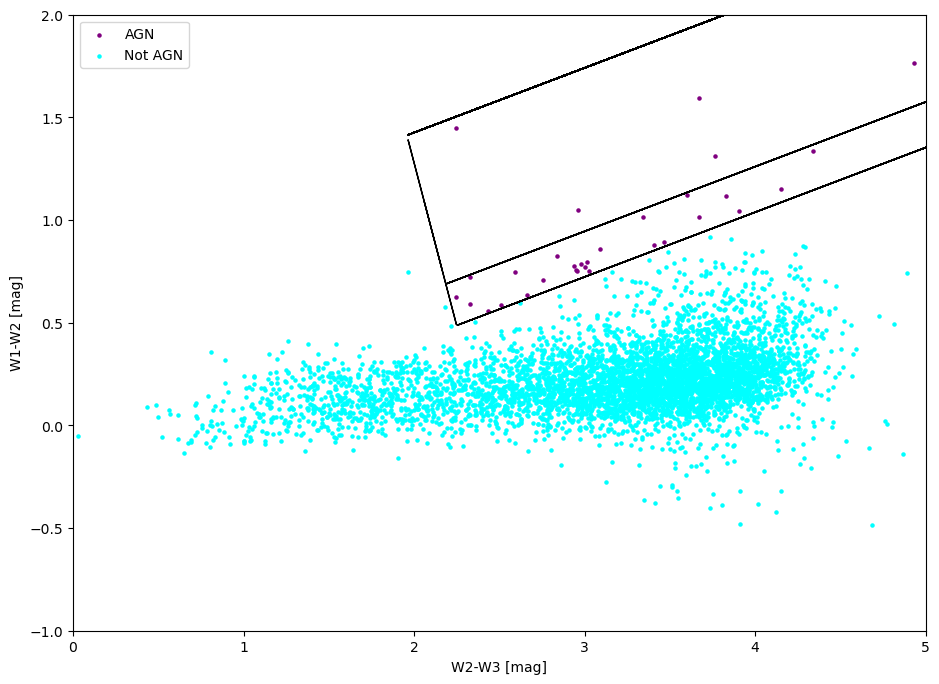

In [95]:
# plotting of WISE-WISE colour diagram for the above galaxies obtained using SDSS

mask3 = W_y3<W_y4
mask4 = W_y3<W_y5
mask5 = W_y3<W_y1
mask6 = (W_y3<W_y4) & (W_y3>W_y5)

mask7 = (W_y >= W_y5) & (W_x >= W_x3) & (W_y <= W_y4)
mask8 = ~(mask7)

plt.figure(figsize=(11,8))
plt.scatter(W_x[mask7], W_y[mask7], color='purple', s=5, label='AGN')
plt.scatter(W_x[mask8], W_y[mask8], color='cyan', s=5, label='Not AGN')
plt.plot(W_x[mask5], W_y1[mask5], color='black', linewidth=1)
plt.plot(W_x[mask6], W_y3[mask6], color='black', linewidth=1)
plt.plot(W_x[mask3], W_y4[mask3], color='black', linewidth=1)
plt.plot(W_x[mask4], W_y5[mask4], color='black', linewidth=1)
plt.xlabel('W2-W3 [mag]')
plt.ylabel('W1-W2 [mag]')
plt.xlim(0,5)
plt.ylim(-1,2)
plt.legend()

(-1.0, 2.0)

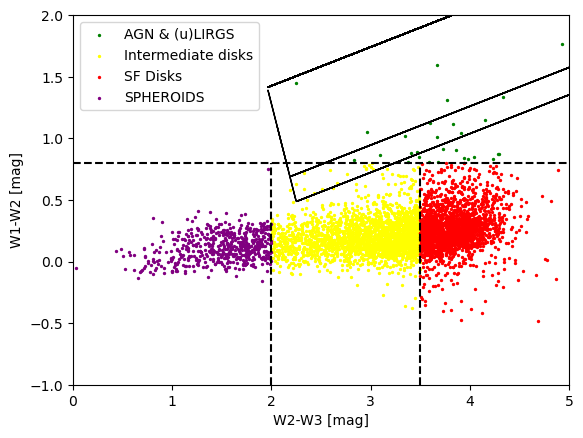

In [96]:
# plotting of WISE-WISE colour diagram for the above galaxies obtained using SDSS

#plt.scatter(W_x, W_y, color='cyan', s=5)
plt.xlabel('W2-W3 [mag]')
plt.ylabel('W1-W2 [mag]')

AGN = (W_y >= 0.8) 
ID = ((W_y <= 0.8) & (W_x <= 3.5) & (W_x>=2))
SF = ((W_y <= 0.8) & (W_x >= 3.5))
SPHEROIDS = ((W_y <= 0.8) & (W_x <= 2))

plt.scatter(W_x[AGN], W_y[AGN], color='green', s=2, label='AGN & (u)LIRGS')
plt.scatter(W_x[ID], W_y[ID], color='yellow', s=2, label='Intermediate disks')
plt.scatter(W_x[SF], W_y[SF], color='red', s=2, label='SF Disks')
plt.scatter(W_x[SPHEROIDS], W_y[SPHEROIDS], color='purple', s=2, label='SPHEROIDS')
plt.legend()

plt.plot(W_x[mask6], W_y3[mask6], color='black', linewidth=1)
plt.plot(W_x[mask3], W_y4[mask3], color='black', linewidth=1)
plt.plot(W_x[mask4], W_y5[mask4], color='black', linewidth=1)
plt.plot(W_x[mask5], W_y1[mask5], color='black', linewidth=1)

#plotting a horizontal line in a scatter plot
plt.axhline(0.8, linestyle='--', color='black')   

#plotting a vertical line in a scatter plot
plt.axvline(2, ymax=0.6, linestyle='--', color='black')
plt.axvline(3.5, ymax=0.6, linestyle='--', color='black')
plt.xlim(0,5)
plt.ylim(-1,2)
#plt.title('WISE color-color diagram from Jarrett et al. (2017) showing location of different galaxy types defined by Wright et al. (2010)')

In [64]:
# counting the no. of each type of classification, i.e., AGN for the two different WISE classification 
mask9 = data6[['WISE classification', 'Mateos classification']] == 'AGN'

# Use the boolean mask to filter the dataframe and count the number of matches
count1 = mask9.all(axis=1).sum()


print(count1)   #AGN


16


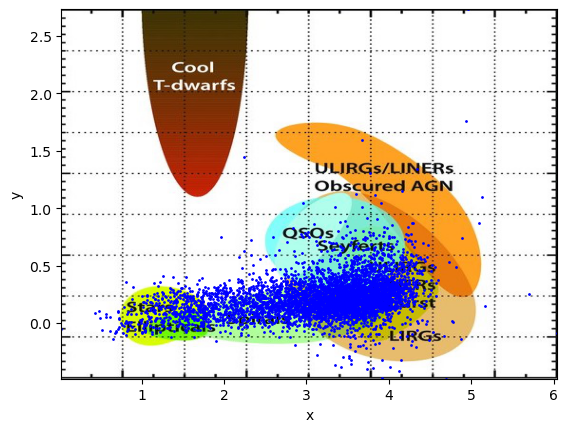

In [65]:
import matplotlib.image as mpimg

# Load the image
image_path = ("C:/Users/SREEPARNA/OneDrive/Pictures/Wright1.jpg")   #image taken from (Wright et al. 2010)
image = mpimg.imread(image_path)


#x_values = data6['W2-W3']
#y_values = data6['W1-W2']

# Plot the scatter plot
plt.scatter(W_x, W_y, color='blue', s=1)
#plt.xlim(0,5)

# Overlay the image on the plot
plt.imshow(image, extent=[min(W_x), max(W_x), min(W_y), max(W_y)], aspect='auto')

# Set plot labels
plt.xlabel('x')
plt.ylabel('y')

# Show the plot
plt.show()

Text(4, -0.4, 'SF disks')

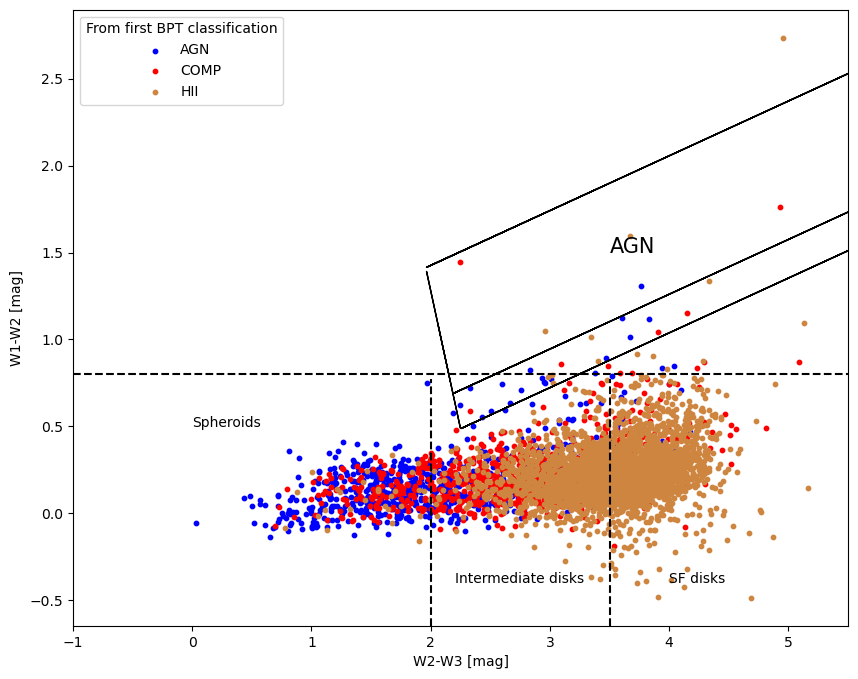

In [80]:
# plotting of the WISE diagrams 
plt.figure(figsize=(10,8))
plt.xlabel('W2-W3 [mag]')
plt.ylabel('W1-W2 [mag]')

# plotting using BPT classification by defining a function
def plot_bpt(data, classification, color):
    data_to_plot = data[data6['BPT 1 classification'] == classification]
    plt.scatter(data_to_plot['W2-W3'], data_to_plot['W1-W2'], color=color, s=10)
    
bpt_class = ['AGN', 'COMP', 'HII']
colors = ['blue', 'red', 'peru']


for i in range(len(bpt_class)):
    plot_bpt(data6, bpt_class[i], colors[i])

plt.legend(bpt_class, title='From first BPT classification')

plt.plot(W_x[mask6], W_y3[mask6], color='black', linewidth=1)
plt.plot(W_x[mask3], W_y4[mask3], color='black', linewidth=1)
plt.plot(W_x[mask4], W_y5[mask4], color='black', linewidth=1)
plt.plot(W_x[mask5], W_y1[mask5], color='black', linewidth=1)

#plotting a horizontal line in a scatter plot
plt.axhline(0.8, linestyle='--', color='black')   

#plotting a vertical line in a scatter plot
plt.axvline(2, ymax=0.4, linestyle='--', color='black')
plt.axvline(3.5, ymax=0.4, linestyle='--', color='black')
plt.xlim(-1, 5.5)

plt.text(3.5,1.5, 'AGN', fontsize=15)
plt.text(0,0.5, 'Spheroids', fontsize=10)
plt.text(2.2,-0.4, 'Intermediate disks', fontsize=10)
plt.text(4,-0.4, 'SF disks', fontsize=10)

In [81]:
# counting the no. of each type of classification, i.e., AGN  
mask10 = data6[['WISE classification', 'Mateos classification', 'BPT 1 classification']] == 'AGN'
# Use the boolean mask to filter the dataframe and count the number of matches
count1 = mask10.all(axis=1).sum()
print(count1)   #AGN

6


In [82]:
# counting the no. of each type of classification, i.e., AGN  
mask10 = data6[['Mateos classification', 'BPT 1 classification']] == 'AGN'
# Use the boolean mask to filter the dataframe and count the number of matches
count1 = mask10.all(axis=1).sum()
print(count1)   #AGN

17


In [83]:
# counting the no. of each type of classification, i.e., AGN  
mask10 = data6[['WISE classification', 'BPT 1 classification']] == 'AGN'
# Use the boolean mask to filter the dataframe and count the number of matches
count1 = mask10.all(axis=1).sum()
print(count1)   #AGN

9


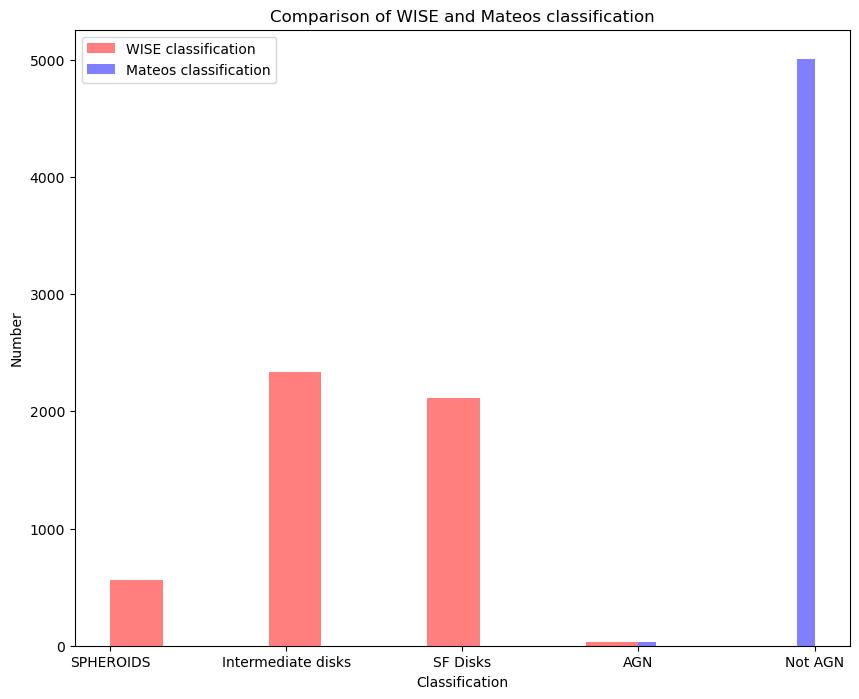

In [109]:
plt.figure(figsize=(10,8))
plt.hist(data6['WISE classification'], color='red', label='WISE classification', alpha=0.5)
plt.hist(data6['Mateos classification'], color='blue', label='Mateos classification', alpha=0.5)
#plt.hist(data6['BPT 1 classification'], color='yellow', label='BPT 1 classification', alpha=0.5)
plt.xlabel('Classification')
plt.ylabel('Number')
plt.title('Comparison of WISE and Mateos classification')
plt.legend()
plt.show()

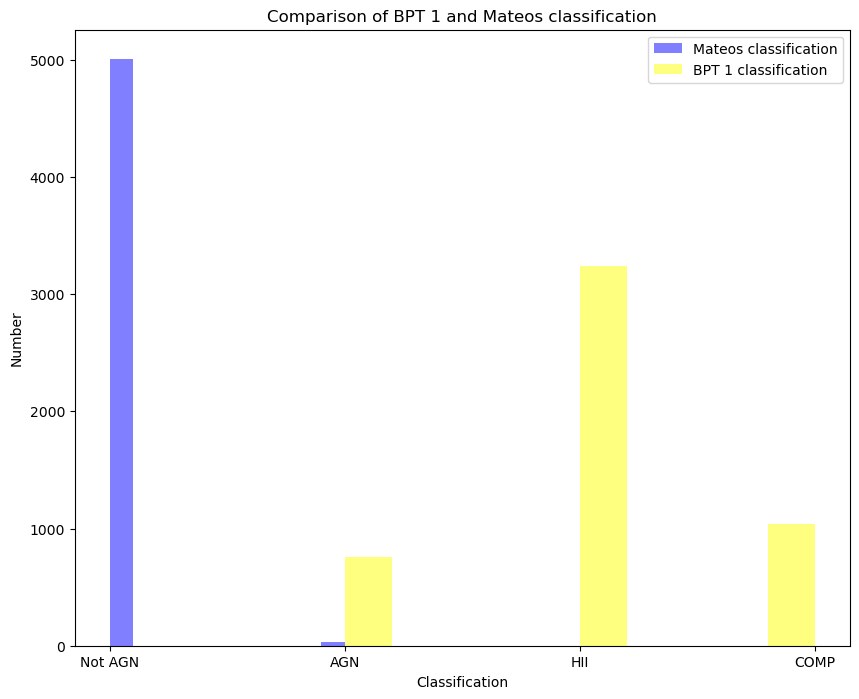

In [110]:
plt.figure(figsize=(10,8))
#plt.hist(data6['WISE classification'], color='red', label='WISE classification', alpha=0.5)
plt.hist(data6['Mateos classification'], color='blue', label='Mateos classification', alpha=0.5)
plt.hist(data6['BPT 1 classification'], color='yellow', label='BPT 1 classification', alpha=0.5)
plt.xlabel('Classification')
plt.ylabel('Number')
plt.title('Comparison of BPT 1 and Mateos classification')
plt.legend()
plt.show()

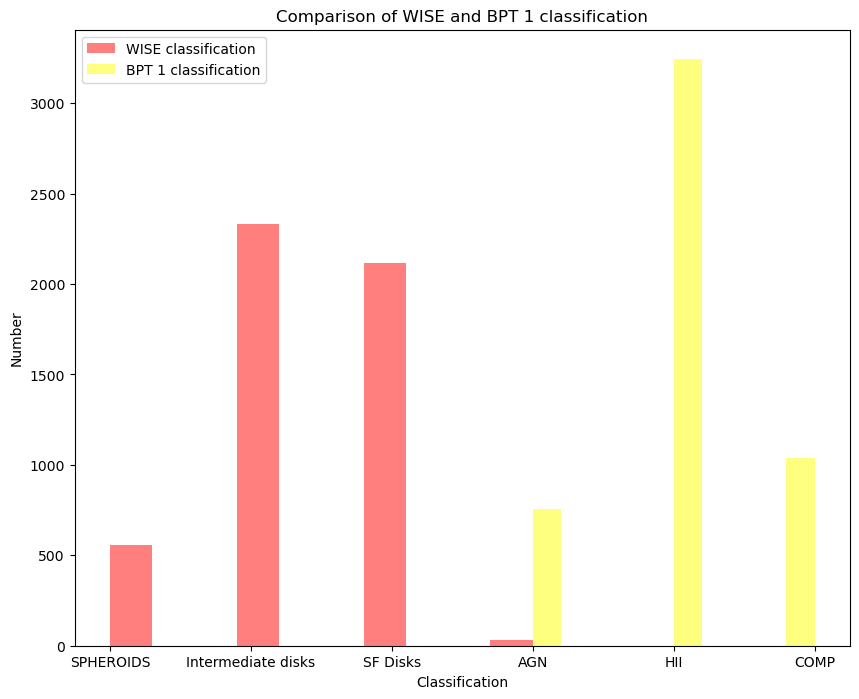

In [106]:
plt.figure(figsize=(10,8))
plt.hist(data6['WISE classification'], color='red', label='WISE classification', alpha=0.5)
#plt.hist(data6['Mateos classification'], color='orange', label='Mateos classification', alpha=0.5)
plt.hist(data6['BPT 1 classification'], color='yellow', label='BPT 1 classification', alpha=0.5)
plt.xlabel('Classification')
plt.ylabel('Number')
plt.title('Comparison of WISE and BPT 1 classification')
plt.legend()
plt.show()